<img src="res/logo/coolpi.png" width="200">

# Notebook

# Calculation of the RGB to XYZ transformation matrix: Preparation of data for adjustment

# Nikon Z7ii

## `NZ-WPPDS`

CIE XYZ ---> X, Y, Z Computed from spectral reflectance data. WPP --> WhitePatch Xwpp, Ywpp, Zwpp. 

X/Xwpp Y/Ywpp Z/Zwpp 

RAW RGB ---> 16 bits; black level correction; demosaiced (undo Bayer Pattern). WPP ---> WhitePatch Rwpp, Gwpp, Bwpp

R/Rwpp, G/Gwpp, B/Bwpp

In [1]:
def find_patch_max_value(data):
    max_x = data[data['X'] == data['X'].max()]
    max_y = data[data['Y'] == data['Y'].max()]
    max_z = data[data['Z'] == data['Z'].max()]
    max_r = data[data['R'] == data['R'].max()]
    max_g = data[data['G'] == data['G'].max()]
    max_b = data[data['B'] == data['B'].max()]
    patch_max = {"XYZ": {"patch_id": [max_x.patch_id.values[0], max_y.patch_id.values[0], max_z.patch_id.values[0]]}, 
                 "RGB": {"patch_id": [max_r.patch_id.values[0], max_g.patch_id.values[0], max_b.patch_id.values[0]]}}
    return patch_max

In [2]:
def apply_wpp(data, white_patch):
    res = data[data.patch_id==white_patch].iloc[-1]
    iloc = data.index.get_loc(res.name)
    wpp_data = data.copy()

    Xmax, Ymax, Zmax = float(data.X.iloc[iloc]),float(data.Y.iloc[iloc]) ,float(data.Z.iloc[iloc]) 
    wpp_data["X"] = wpp_data.X/Xmax
    wpp_data["Y"] = wpp_data.Y/Ymax
    wpp_data["Z"] = wpp_data.Z/Zmax

    Rmax, Gmax, Bmax = float(data.R.iloc[iloc]),float(data.G.iloc[iloc]) ,float(data.B.iloc[iloc]) 
    wpp_data["R"] = wpp_data.R/Rmax
    wpp_data["G"] = wpp_data.G/Gmax
    wpp_data["B"] = wpp_data.B/Bmax

    return wpp_data

## Import packages 

In [3]:
import sys
sys.version

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [4]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

## ColourChecker

In [5]:
from coolpi.image.colourchecker import ColourCheckerSpectral

Spectral data measured using a Konica Minolta CM600-d

### CCDSG

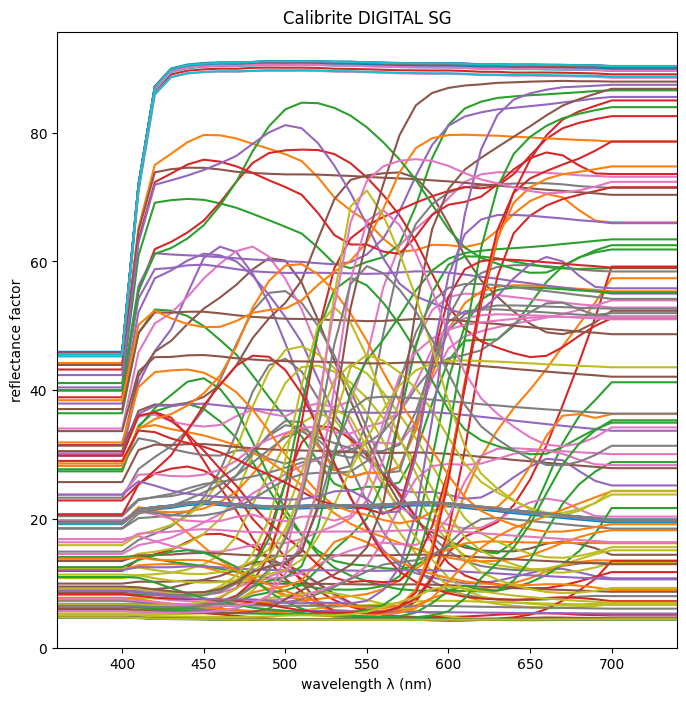

In [6]:
CCDSG = ColourCheckerSpectral("CCDSG")
CCDSG.plot_colourchecker()

### CCC

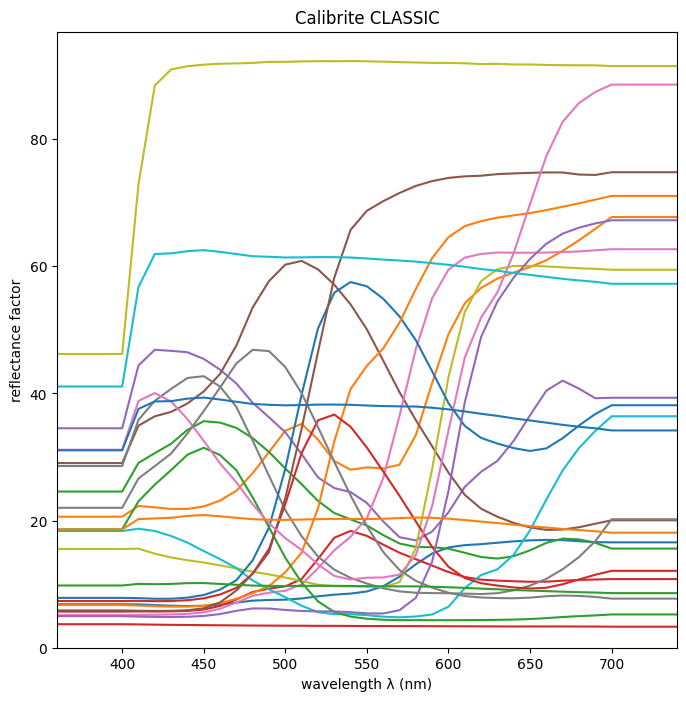

In [7]:
CCC = ColourCheckerSpectral("CCC")
CCC.plot_colourchecker()

### XRCCPP

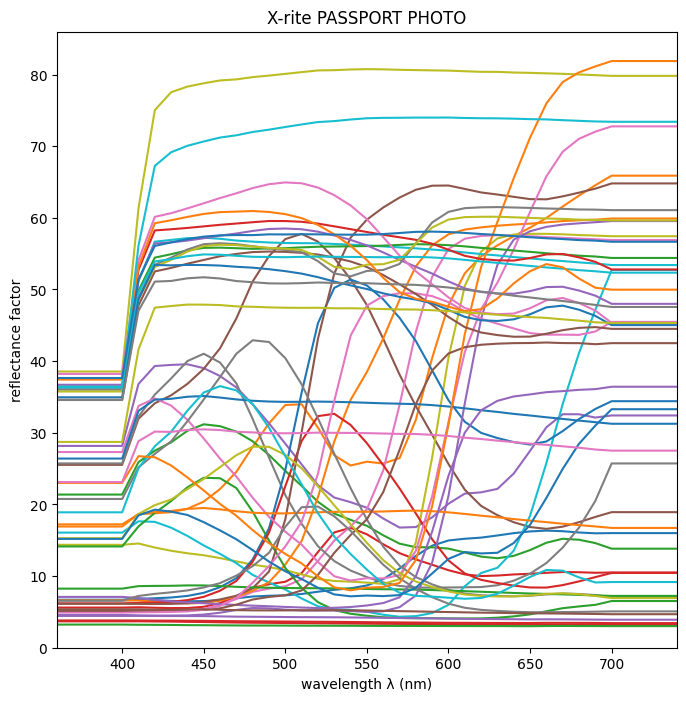

In [9]:
XRCCPP = ColourCheckerSpectral("XRCCPP")
XRCCPP.plot_colourchecker()

### SCK100

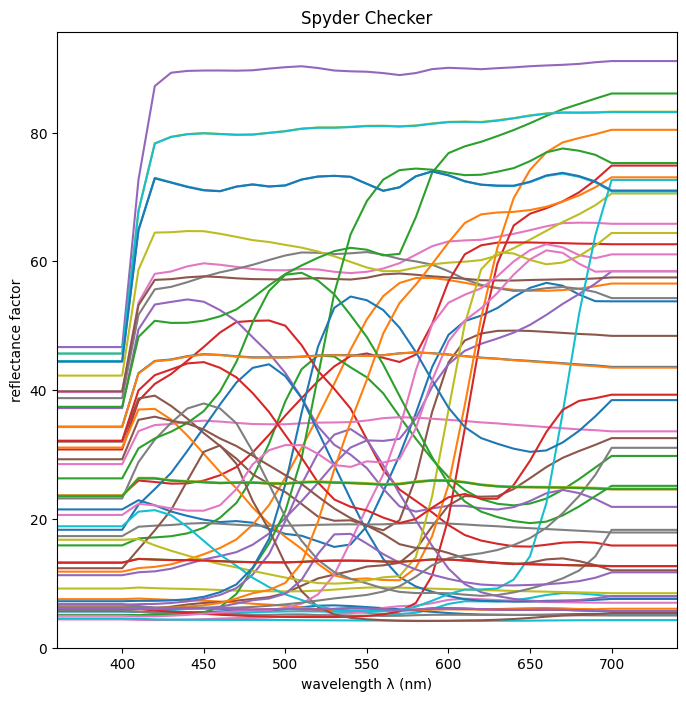

In [10]:
SCK100 = ColourCheckerSpectral("SCK100")
SCK100.plot_colourchecker()

## Indoor

## IN-29

In [11]:
data_wpp_in29 = []

| Image                             |  Illuminant  | ColourChecker                        | Patches |
|-----------------------------------|--------------|--------------------------------------|---------|
| INDIGO_2022-05-25_Z7ii-A_0002.NEF | IN-29-3066ºK | CCDSG  - Calibrite DIGITAL SG        | 96      |
| INDIGO_2022-05-25_Z7ii-A_0001.NEF | IN-29-3066ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-25_Z7ii-A_0005.NEF | IN-29-3066ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-25_Z7ii-A_0003.NEF | IN-29-3066ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/SPD29/INDIGO_2022-05-25_Z7ii-A_0002.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD29/INDIGO_2022-05-25_Z7ii-A_0001.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD29/INDIGO_2022-05-25_Z7ii-A_0005.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD29/INDIGO_2022-05-25_Z7ii-A_0003.jpg" width="500">

## SPD Illuminant

In [12]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

IN-29

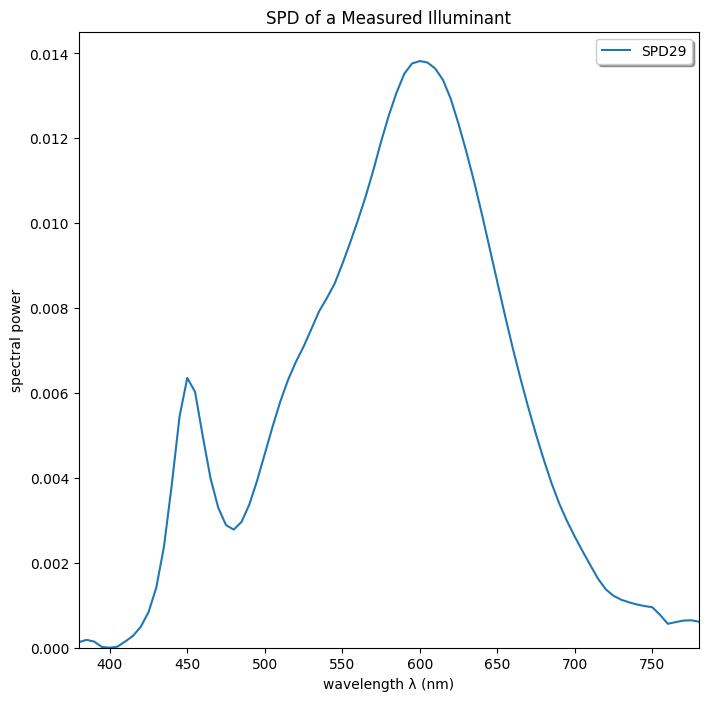

In [13]:
file_spd = ["res", "spd", "INDIGO-C7000-A_029_02°_3066K.csv"]
path_spd = os.path.join(*file_spd)

IN29 = MeasuredIlluminant(illuminant_name="IN-29", path_file=path_spd)

IN29.plot()

XYZ data (under IN-29)

In [14]:
CCDSG_XYZ_IN29 = CCDSG.to_ColourCheckerXYZ(illuminant=IN29, observer=2).as_pandas_dataframe()

In [15]:
CCC_XYZ_IN29 = CCC.to_ColourCheckerXYZ(illuminant=IN29, observer=2).as_pandas_dataframe()

In [17]:
XRCCPP_XYZ_IN29 = XRCCPP.to_ColourCheckerXYZ(illuminant=IN29, observer=2).as_pandas_dataframe()

In [18]:
SCK100_XYZ_IN29 = SCK100.to_ColourCheckerXYZ(illuminant=IN29, observer=2).as_pandas_dataframe()

## RawImage

In [19]:
from coolpi.image.image_objects import RawImage

### CCDSG

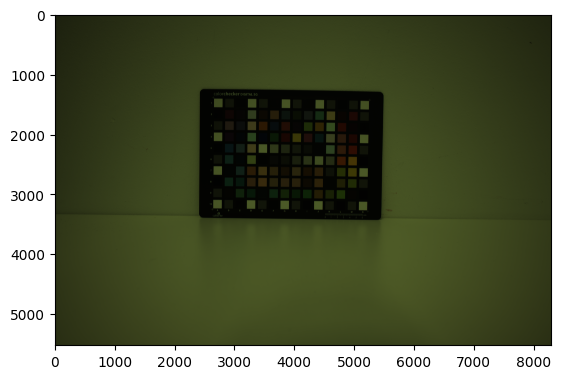

In [20]:
file_raw_0002i = ["data", "NikonZ7ii", "Indoor", "IN29", "INDIGO_2022-05-25_Z7ii-A_0002.NEF"]
path_raw_0002i= os.path.join(*file_raw_0002i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "CCDSG", "Illuminant": IN29, "Observer":2}
image_0002i = RawImage(path_raw_0002i, metadata, method="postprocess")

image_0002i.show(method="matplotlib")

RAW RGB data extraction

In [21]:
has_colourchecker, corners, size_rect = image_0002i.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

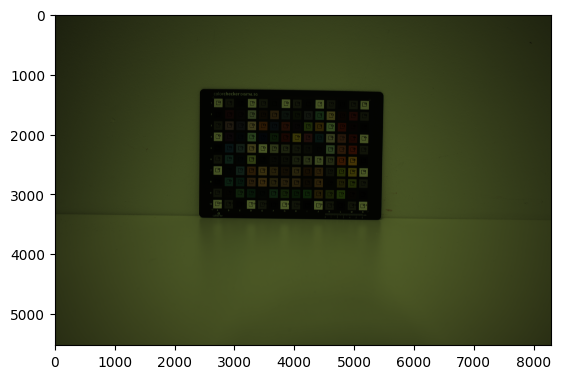

In [22]:
image_0002i.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [23]:
CCDSG_RGB_IN29 = image_0002i.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [24]:
data_ccdsg_in29 = pd.merge(CCDSG_XYZ_IN29, CCDSG_RGB_IN29, on="patch_id")
data_ccdsg_in29.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_in29

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD29.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD29.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD29.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD29.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD29.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD29.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD29.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD29.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD29.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD29.   

             X          Y          Z  \
0    96.771572  90.822074  35.146865   
1     4.696973   4.393165   1.729254   
2    23.559525  22.126330   8.669264   
3    95.624548  89.752257  34.799657   
4     4.679151   4.377760   1.725099   
..         ...        ...        ...   
135   4.675006   4.374294   1.723640   
136  96.145341  90.237786  34.976679   
137  23.629011  22.187937   8.680344   
138   4.648385   4.347814   1.708612   
139  96.783527  90.827564  35.149335   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD29.  4030.961914  4761.754639   
1    MeasuredIlluminant object: Illuminant SPD29.   129.402344   152.229980   
2    MeasuredIlluminant object: Illuminant SPD29.   973.266846  1154.932373   
3    MeasuredIlluminant object: Illuminant SPD29.  4311.121582  5099.252930   
4    MeasuredIlluminant object: Illuminant SPD29.   121.038086   140.398438   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD29.   154.139160   167.774902   
136  MeasuredIlluminant object: Illuminant SPD29.  4778.034668  5637.174805   
137  MeasuredIlluminant object: Illuminant SPD29.  1105.197510  1300.128906   
138  MeasuredIlluminant object: Illuminant SPD29.   151.546875   164.936035   
139  MeasuredIlluminant object: Illuminant SPD29.  4757.801270  5624.410645   

               B  
0    2106.964111  
1      70.392578  
2     513.351562  
3    2254.115234  
4      64.810059  
..           ...  
135    74.569824  
136  2469.194824  
137   572.479980  
138    73.155762  
139  2463.309326  

[140 rows x 10 columns]

In [25]:
data_ccdsg_in29 = data_ccdsg_in29[(data_ccdsg_in29["patch_id"].str.contains("1")==False) & (data_ccdsg_in29["patch_id"].str.contains("0")==False) & (data_ccdsg_in29["patch_id"].str.contains("0")==False) & (data_ccdsg_in29["patch_id"].str.contains("A")==False) & (data_ccdsg_in29["patch_id"].str.contains("N")==False)]
data_ccdsg_in29

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD29.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD29.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD29.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD29.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD29.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD29.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD29.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD29.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD29.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD29.   

             X          Y          Z  \
11   19.125010  11.908563   5.512490   
12   42.864090  33.674957  18.235348   
13   15.248152  10.003906   9.838510   
14   15.711591  17.511714  22.149210   
15   22.640271  27.328599  20.701565   
..         ...        ...        ...   
124  47.748179  28.131103   2.938529   
125  83.706188  69.124143   4.036143   
126  74.260794  67.172312   3.355206   
127  44.571362  46.376353   3.452198   
128   8.574376   7.161370   1.872964   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD29.   949.927734   387.938477   
12   MeasuredIlluminant object: Illuminant SPD29.  2042.370605  1675.081055   
13   MeasuredIlluminant object: Illuminant SPD29.   686.565430   394.347168   
14   MeasuredIlluminant object: Illuminant SPD29.   516.881348  1322.264160   
15   MeasuredIlluminant object: Illuminant SPD29.   844.342773  2028.788574   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD29.  2954.285156   879.955566   
125  MeasuredIlluminant object: Illuminant SPD29.  4450.046387  3427.479004   
126  MeasuredIlluminant object: Illuminant SPD29.  3881.894043  3678.513428   
127  MeasuredIlluminant object: Illuminant SPD29.  2100.892578  2800.310547   
128  MeasuredIlluminant object: Illuminant SPD29.   378.783203   278.063477   

               B  
11    270.404297  
12   1041.405762  
13    468.224121  
14   1294.863770  
15   1357.920410  
..           ...  
124   211.485840  
125   429.550781  
126   423.710205  
127   385.422363  
128    86.335938  

[96 rows x 10 columns]

### WPP

White - E5

In [27]:
patch_max = find_patch_max_value(data_ccdsg_in29)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [28]:
data_ccdsg_in29 = apply_wpp(data_ccdsg_in29, "E5")
data_ccdsg_in29

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD29.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD29.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD29.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD29.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD29.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD29.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD29.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD29.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD29.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD29.   

            X         Y         Z  \
11   0.197495  0.131045  0.156912   
12   0.442636  0.370569  0.519067   
13   0.157460  0.110086  0.280052   
14   0.162246  0.192704  0.630475   
15   0.233795  0.300732  0.589268   
..        ...       ...       ...   
124  0.493072  0.309563  0.083645   
125  0.864392  0.760662  0.114888   
126  0.766854  0.739184  0.095506   
127  0.460266  0.510339  0.098266   
128  0.088543  0.078806  0.053314   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD29.  0.201206  0.069046   
12   MeasuredIlluminant object: Illuminant SPD29.  0.432597  0.298136   
13   MeasuredIlluminant object: Illuminant SPD29.  0.145422  0.070187   
14   MeasuredIlluminant object: Illuminant SPD29.  0.109481  0.235341   
15   MeasuredIlluminant object: Illuminant SPD29.  0.178841  0.361090   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD29.  0.625751  0.156617   
125  MeasuredIlluminant object: Illuminant SPD29.  0.942571  0.610033   
126  MeasuredIlluminant object: Illuminant SPD29.  0.822230  0.654713   
127  MeasuredIlluminant object: Illuminant SPD29.  0.444993  0.498408   
128  MeasuredIlluminant object: Illuminant SPD29.  0.080231  0.049491   

            B  
11   0.109121  
12   0.420256  
13   0.188950  
14   0.522538  
15   0.547985  
..        ...  
124  0.085344  
125  0.173344  
126  0.170987  
127  0.155536  
128  0.034841  

[96 rows x 10 columns]

In [29]:
data_ccdsg_in29.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.368324   0.351612   0.285931   0.376494   0.326219   0.285795
std     0.239178   0.228610   0.235033   0.258665   0.225797   0.225124
min     0.048201   0.048052   0.048955   0.032326   0.036851   0.034841
25%     0.157346   0.158608   0.098790   0.147904   0.138125   0.111346
50%     0.332618   0.325367   0.210468   0.356183   0.305382   0.212725
75%     0.511842   0.466904   0.414077   0.566089   0.434240   0.389418
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [30]:
data_wpp_in29.append(data_ccdsg_in29)

### CCC

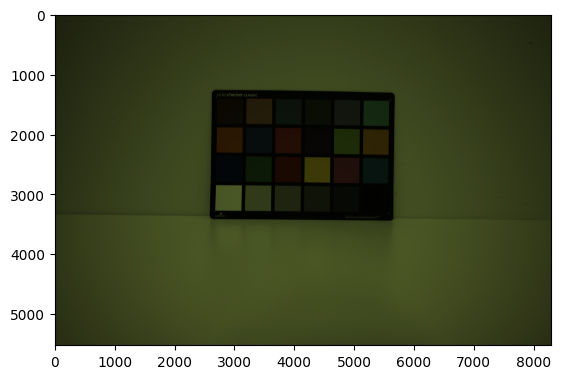

In [31]:
file_raw_0001i = ["data", "NikonZ7ii", "Indoor", "IN29", "INDIGO_2022-05-25_Z7ii-A_0001.NEF"]
path_raw_0001i = os.path.join(*file_raw_0001i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "CCC", "Illuminant": IN29, "Observer":2}
image_0001i = RawImage(path_raw_0001i, metadata, method="postprocess")

image_0001i.show(method="matplotlib")

RAW RGB data extraction

In [32]:
has_colourchecker, corners, size_rect = image_0001i.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

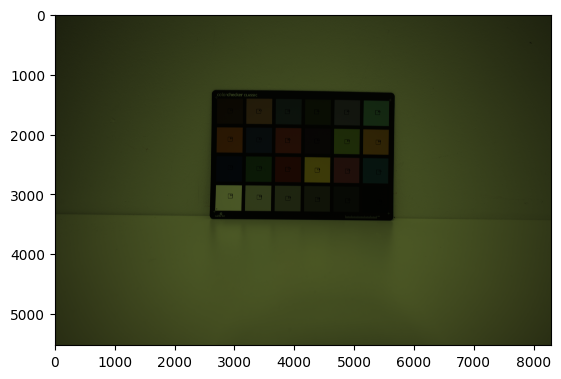

In [33]:
image_0001i.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [34]:
CCC_RGB_IN29 = image_0001i.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [35]:
data_ccc_in29 = pd.merge(CCC_XYZ_IN29, CCC_RGB_IN29, on="patch_id")
data_ccc_in29.insert(0, "ColourChecker", "CCC")
data_ccc_in29

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD29.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD29.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD29.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD29.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD29.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD29.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD29.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD29.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD29.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD29.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD29.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD29.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD29.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD29.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD29.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD29.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD29.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD29.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD29.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD29.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD29.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD29.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD29.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD29.   

            X          Y          Z  \
0   14.806400  11.957599   2.667352   
1   46.651406  37.499539   9.363273   
2   18.041452  17.936713  13.098833   
3   13.204606  14.034073   2.728836   
4   26.106693  22.949491  16.610687   
5   33.495393  40.002166  17.099758   
6   52.079236  37.922645   2.561303   
7   11.521576  10.485721  14.869410   
8   37.262736  23.390308   5.018661   
9    9.114046   6.651890   5.353359   
10  42.338351  46.173388   4.661667   
11  60.998245  49.966251   3.150658   
12   6.287833   5.341746  10.743898   
13  16.915441  22.449127   3.992271   
14  27.304395  15.795421   2.059278   
15  73.552683  66.825008   3.862270   
16  35.482094  22.583837  11.440053   
17  12.893760  16.444234  15.011009   
18  98.133410  92.111651  35.552295   
19  64.365302  60.730697  24.095590   
20  39.972809  37.771967  15.098582   
21  21.500770  20.233625   7.989609   
22  10.142538   9.592271   3.886629   
23   3.617540   3.402525   1.370162   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD29.   725.986883   574.088349   
1   MeasuredIlluminant object: Illuminant SPD29.  2304.921296  1798.161265   
2   MeasuredIlluminant object: Illuminant SPD29.   769.333719  1164.398920   
3   MeasuredIlluminant object: Illuminant SPD29.   596.445216   854.609568   
4   MeasuredIlluminant object: Illuminant SPD29.  1205.637539  1391.601466   
5   MeasuredIlluminant object: Illuminant SPD29.  1292.906829  2556.241512   
6   MeasuredIlluminant object: Illuminant SPD29.  2714.249228  1527.113426   
7   MeasuredIlluminant object: Illuminant SPD29.   482.465278   785.993056   
8   MeasuredIlluminant object: Illuminant SPD29.  2170.368827   902.522762   
9   MeasuredIlluminant object: Illuminant SPD29.   479.903549   387.715278   
10  MeasuredIlluminant object: Illuminant SPD29.  1901.214892  2777.798611   
11  MeasuredIlluminant object: Illuminant SPD29.  3016.212963  2272.160494   
12  MeasuredIlluminant object: Illuminant SPD29.   241.212963   417.441744   
13  MeasuredIlluminant object: Illuminant SPD29.   716.3904

### WPP

White - D1

In [37]:
patch_max = find_patch_max_value(data_ccc_in29)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [38]:
data_ccc_in29 = apply_wpp(data_ccc_in29, "D1")
data_ccc_in29

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD29.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD29.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD29.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD29.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD29.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD29.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD29.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD29.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD29.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD29.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD29.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD29.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD29.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD29.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD29.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD29.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD29.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD29.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD29.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD29.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD29.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD29.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD29.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD29.   

           X         Y         Z  \
0   0.150880  0.129816  0.075026   
1   0.475388  0.407110  0.263366   
2   0.183846  0.194728  0.368438   
3   0.134558  0.152359  0.076756   
4   0.266033  0.249149  0.467218   
5   0.341325  0.434279  0.480975   
6   0.530698  0.411703  0.072043   
7   0.117407  0.113837  0.418241   
8   0.379715  0.253934  0.141163   
9   0.092874  0.072216  0.150577   
10  0.431437  0.501276  0.131121   
11  0.621585  0.542453  0.088620   
12  0.064074  0.057992  0.302200   
13  0.172372  0.243716  0.112293   
14  0.278238  0.171481  0.057922   
15  0.749517  0.725478  0.108636   
16  0.361570  0.245179  0.321781   
17  0.131390  0.178525  0.422223   
18  1.000000  1.000000  1.000000   
19  0.655896  0.659316  0.677751   
20  0.407331  0.410067  0.424687   
21  0.219097  0.219664  0.224728   
22  0.103355  0.104137  0.109321   
23  0.036863  0.036939  0.038539   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD29.  0.154852  0.103920  0.078835  
1   MeasuredIlluminant object: Illuminant SPD29.  0.491638  0.325500  0.273960  
2   MeasuredIlluminant object: Illuminant SPD29.  0.164098  0.210777  0.319218  
3   MeasuredIlluminant object: Illuminant SPD29.  0.127221  0.154700  0.096773  
4   MeasuredIlluminant object: Illuminant SPD29.  0.257161  0.251905  0.394091  
5   MeasuredIlluminant object: Illuminant SPD29.  0.275776  0.462726  0.468057  
6   MeasuredIlluminant object: Illuminant SPD29.  0.578947  0.276435  0.102352  
7   MeasuredIlluminant object: Illuminant SPD29.  0.102909  0.142279  0.342504  
8   MeasuredIlluminant object: Illuminant SPD29.  0.462938  0.163373  0.143778  
9   MeasuredIlluminant object: Illuminant SPD29.  0.102363  0.070183  0.126381  
10  MeasuredIlluminant object: Illuminant SPD29.  0.405527  0.502832  0.215754  
11  MeasuredIlluminant object: Illuminant SPD29.  0.643356  0.411302  0.134604  
12  MeasuredIlluminant object: Illuminant SPD29.  0.051451  0.075565  0.236552  
13  MeasuredIlluminant object: Illuminant SPD29.  0.152805  0.292352  0.170377  
14  Measure

In [39]:
data_ccc_in29.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.329394   0.313140   0.272234   0.339774   0.296876   0.274780
std     0.245112   0.238884   0.232182   0.259231   0.233263   0.218701
min     0.036863   0.036939   0.038539   0.040821   0.041578   0.043100
25%     0.133766   0.146724   0.103632   0.121732   0.133786   0.122565
50%     0.272135   0.244448   0.187653   0.266469   0.234215   0.226093
75%     0.442424   0.417347   0.419236   0.470113   0.415819   0.355401
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [40]:
data_wpp_in29.append(data_ccc_in29)

### XRCCPP

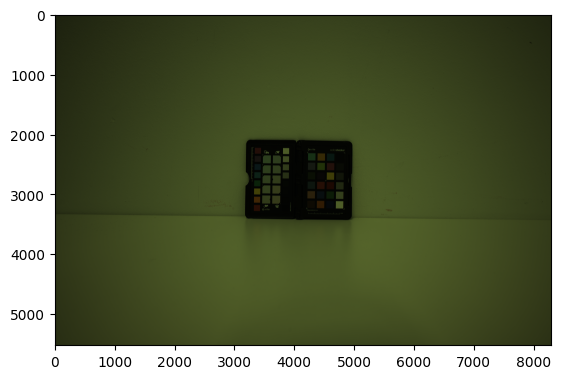

In [52]:
file_raw_0005i = ["data", "NikonZ7ii", "Indoor", "IN29", "INDIGO_2022-05-25_Z7ii-A_0005.NEF"]
path_raw_0005i = os.path.join(*file_raw_0005i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "XRCCPP", "Illuminant": IN29, "Observer":2}
image_0005i = RawImage(path_raw_0005i, metadata, method="postprocess")

image_0005i.show(method="matplotlib")

RAW RGB data extraction

In [53]:
has_colourchecker, corners, size_rect = image_0005i.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

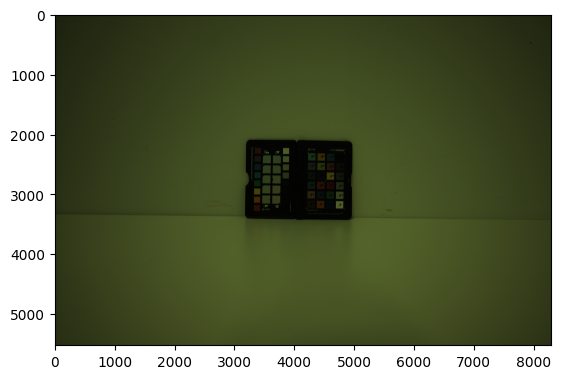

In [54]:
image_0005i.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [55]:
XRCCPP_RGB_IN29 = image_0005i.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [56]:
data_xrccpp_in29 = pd.merge(XRCCPP_XYZ_IN29, XRCCPP_RGB_IN29, on="patch_id")
data_xrccpp_in29.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_in29

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD29.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD29.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD29.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD29.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD29.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD29.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD29.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD29.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD29.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD29.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD29.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD29.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD29.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD29.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD29.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD29.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD29.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD29.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD29.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD29.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD29.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD29.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD29.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD29.   

            X          Y          Z  \
0   14.192137  11.543874   2.614388   
1   44.735938  35.565487   8.831915   
2   15.988685  15.872490  11.485769   
3   12.061703  12.767403   2.595309   
4   22.659072  20.181992  14.285994   
5   31.334684  37.780145  16.433714   
6   48.582606  35.522919   2.480297   
7   11.342913  10.309104  14.278436   
8   35.529684  22.256532   4.835478   
9    8.576615   6.332388   5.068617   
10  37.923792  41.211412   4.232704   
11  54.693612  45.122136   2.968507   
12   5.652950   4.923048   8.225931   
13  15.774116  20.707788   3.765771   
14  25.198973  14.496382   1.888960   
15  63.830871  58.342953   3.493350   
16  32.145930  20.475120  10.303722   
17  12.004888  15.275139  13.902373   
18  85.797263  80.561189  30.598217   
19  59.192924  55.783732  22.086389   
20  35.912083  33.910474  13.508510   
21  20.036012  18.890912   7.457724   
22   8.538426   8.096610   3.329593   
23   3.523140   3.326572   1.377644   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD29.   856.132231   698.074380   
1   MeasuredIlluminant object: Illuminant SPD29.  2752.537190  2117.181818   
2   MeasuredIlluminant object: Illuminant SPD29.   891.057851  1375.033058   
3   MeasuredIlluminant object: Illuminant SPD29.   679.991736   984.076446   
4   MeasuredIlluminant object: Illuminant SPD29.  1371.909091  1648.888430   
5   MeasuredIlluminant object: Illuminant SPD29.  1500.123967  3088.392562   
6   MeasuredIlluminant object: Illuminant SPD29.  3086.553719  1774.111570   
7   MeasuredIlluminant object: Illuminant SPD29.   568.082645   925.396694   
8   MeasuredIlluminant object: Illuminant SPD29.  2413.772727  1001.533058   
9   MeasuredIlluminant object: Illuminant SPD29.   545.024793   455.570248   
10  MeasuredIlluminant object: Illuminant SPD29.  2198.685950  3228.619835   
11  MeasuredIlluminant object: Illuminant SPD29.  3440.524793  2694.776860   
12  MeasuredIlluminant object: Illuminant SPD29.   289.128099   513.210744   
13  MeasuredIlluminant object: Illuminant SPD29.   789.1260

### WPP

White - D1

In [58]:
patch_max = find_patch_max_value(data_xrccpp_in29)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [59]:
data_xrccpp_in29 = apply_wpp(data_xrccpp_in29, "D1")
data_xrccpp_in29

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD29.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD29.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD29.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD29.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD29.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD29.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD29.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD29.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD29.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD29.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD29.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD29.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD29.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD29.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD29.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD29.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD29.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD29.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD29.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD29.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD29.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD29.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD29.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD29.   

           X         Y         Z  \
0   0.165415  0.143293  0.085442   
1   0.521415  0.441472  0.288641   
2   0.186354  0.197024  0.375374   
3   0.140584  0.158481  0.084819   
4   0.264100  0.250518  0.466890   
5   0.365218  0.468962  0.537081   
6   0.566249  0.440943  0.081060   
7   0.132206  0.127966  0.466643   
8   0.414112  0.276269  0.158031   
9   0.099964  0.078603  0.165651   
10  0.442016  0.511554  0.138332   
11  0.637475  0.560098  0.097016   
12  0.065887  0.061109  0.268837   
13  0.183853  0.257044  0.123072   
14  0.293704  0.179943  0.061734   
15  0.743973  0.724207  0.114168   
16  0.374673  0.254156  0.336743   
17  0.139922  0.189609  0.454352   
18  1.000000  1.000000  1.000000   
19  0.689916  0.692439  0.721819   
20  0.418569  0.420928  0.441480   
21  0.233527  0.234491  0.243731   
22  0.099519  0.100503  0.108817   
23  0.041064  0.041292  0.045024   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD29.  0.170378  0.115951  0.089986  
1   MeasuredIlluminant object: Illuminant SPD29.  0.547779  0.351668  0.305443  
2   MeasuredIlluminant object: Illuminant SPD29.  0.177328  0.228396  0.349100  
3   MeasuredIlluminant object: Illuminant SPD29.  0.135324  0.163457  0.105303  
4   MeasuredIlluminant object: Illuminant SPD29.  0.273022  0.273883  0.432028  
5   MeasuredIlluminant object: Illuminant SPD29.  0.298538  0.512988  0.531515  
6   MeasuredIlluminant object: Illuminant SPD29.  0.614252  0.294683  0.112705  
7   MeasuredIlluminant object: Illuminant SPD29.  0.113054  0.153710  0.371136  
8   MeasuredIlluminant object: Illuminant SPD29.  0.480362  0.166357  0.151755  
9   MeasuredIlluminant object: Illuminant SPD29.  0.108465  0.075671  0.138861  
10  MeasuredIlluminant object: Illuminant SPD29.  0.437558  0.536280  0.236944  
11  MeasuredIlluminant object: Illuminant SPD29.  0.684695  0.447608  0.156767  
12  MeasuredIlluminant object: Illuminant SPD29.  0.057539  0.085245  0.268010  
13  MeasuredIlluminant object: Illuminant SPD29.  0.157043  0.291654  0.178289  
14  Measure

In [60]:
data_xrccpp_in29.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.342488   0.325454   0.286032   0.351581   0.307389   0.289965
std     0.248318   0.241311   0.237762   0.260846   0.233659   0.220515
min     0.041064   0.041292   0.045024   0.045305   0.046500   0.049295
25%     0.140418   0.154684   0.105866   0.130010   0.144270   0.133214
50%     0.278902   0.252337   0.204691   0.285780   0.240260   0.234227
75%     0.461866   0.448344   0.444698   0.497217   0.430325   0.384587
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [61]:
data_wpp_in29.append(data_xrccpp_in29)

### SCK100

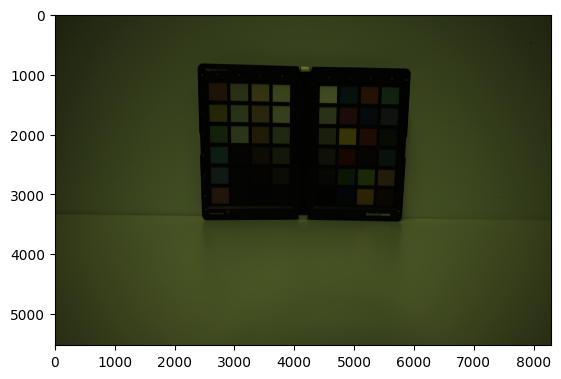

In [62]:
file_raw_0003i = ["data", "NikonZ7ii", "Indoor", "IN29", "INDIGO_2022-05-25_Z7ii-A_0003.NEF"]
path_raw_0003i = os.path.join(*file_raw_0003i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [15, 45, 00]], "ColourChecker": "SCK100", "Illuminant": IN29, "Observer":2}
image_0003i = RawImage(path_raw_0003i, metadata, method="postprocess")

image_0003i.show(method="matplotlib")

RAW RGB data extraction

In [63]:
has_colourchecker, corners, size_rect = image_0003i.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

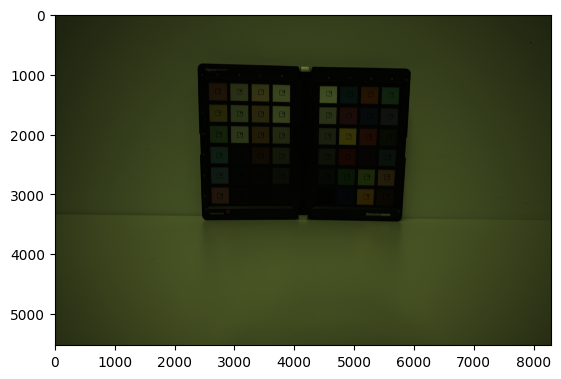

In [64]:
image_0003i.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [65]:
SCK100_RGB_IN29 = image_0003i.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [66]:
data_sck100_in29 = pd.merge(SCK100_XYZ_IN29, SCK100_RGB_IN29, on="patch_id")
data_sck100_in29.insert(0, "ColourChecker", "SCK100")
data_sck100_in29

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD29.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD29.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD29.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD29.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD29.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD29.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD29.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD29.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD29.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD29.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD29.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD29.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD29.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD29.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD29.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD29.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD29.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD29.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD29.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD29.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD29.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD29.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD29.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD29.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD29.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD29.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD29.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD29.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD29.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD29.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD29.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD29.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD29.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD29.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD29.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD29.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD29.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD29.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD29.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD29.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD29.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD29.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD29.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD29.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD29.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD29.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD29.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD29.   

            X          Y          Z  \
0   44.136999  32.656065   7.636606   
1   57.038045  51.447462   6.529875   
2   30.433177  34.384998   8.534928   
3   24.033491  27.413348  18.305585   
4   25.961816  25.708576  19.846792   
5   39.776909  29.428881  12.221297   
6   66.102013  60.603236  22.963392   
7   62.326152  

### WPP

White - E1

In [68]:
patch_max = find_patch_max_value(data_sck100_in29)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [69]:
data_sck100_in29 = apply_wpp(data_sck100_in29, "E1")
data_sck100_in29

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD29.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD29.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD29.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD29.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD29.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD29.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD29.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD29.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD29.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD29.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD29.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD29.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD29.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD29.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD29.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD29.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD29.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD29.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD29.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD29.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD29.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD29.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD29.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD29.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD29.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD29.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD29.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD29.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD29.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD29.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD29.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD29.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD29.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD29.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD29.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD29.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD29.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD29.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD29.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD29.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD29.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD29.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD29.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD29.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD29.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD29.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD29.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD29.   

           X         Y         Z  \
0   0.461077  0.364363  0.219887   
1   0.595848  0.574030  0.188020   
2   0.317920  0.383654  0.245753   
3   0.251066  0.305867  0.527087   
4   0.271210  0.286846  0.571464   
5   0.415529  0.328356  0.351897   
6   0.690534  0.676187  0.661203   
7   0.651090  0.666264  0.648785   
8  

In [70]:
data_sck100_in29.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.358844   0.345976   0.304458   0.379621   0.342960   0.318509
std     0.259319   0.253648   0.249526   0.273300   0.252693   0.246098
min     0.046778   0.046988   0.048292   0.046537   0.047455   0.047909
25%     0.124794   0.137797   0.085934   0.115949   0.132322   0.105546
50%     0.301297   0.286016   0.232820   0.310751   0.273618   0.250605
75%     0.525907   0.516426   0.458729   0.568839   0.503878   0.430400
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [71]:
data_wpp_in29.append(data_sck100_in29)

## Merge data

In [73]:
data_pd_wpp_in29 = pd.concat(data_wpp_in29, ignore_index=True)

data_pd_wpp_in29 = data_pd_wpp_in29.drop(columns="illuminant_y")
data_pd_wpp_in29 = data_pd_wpp_in29.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_in29["illuminant"] = "IN-29" # as str to avoid error
data_pd_wpp_in29

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD29  0.197495  0.131045  0.156912  0.201206   
1           CCDSG       B3      SPD29  0.442636  0.370569  0.519067  0.432597   
2           CCDSG       B4      SPD29  0.157460  0.110086  0.280052  0.145422   
3           CCDSG       B5      SPD29  0.162246  0.192704  0.630475  0.109481   
4           CCDSG       B6      SPD29  0.233795  0.300732  0.589268  0.178841   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD29  0.265750  0.253840  0.467779  0.256203   
212        SCK100       H3      SPD29  0.124990  0.144074  0.076258  0.118333   
213        SCK100       H4      SPD29  0.180049  0.195073  0.360734  0.167948   
214        SCK100       H5      SPD29  0.473688  0.409590  0.261299  0.557270   
215        SCK100       H6      SPD29  0.138804  0.118968  0.070569  0.161021   

            G         B  
0    0.069046  0.109121  
1    0.298136  0.420256  
2    0.070187  0.188950  
3    0.235341  0.522538  
4    0.361090  0.547985  
..        ...       ...  
211  0.260155  0.408109  
212  0.150088  0.089429  
213  0.228387  0.336719  
214  0.373914  0.304425  
215  0.104045  0.076578  

[216 rows x 9 columns]

## IN-30

In [74]:
data_wpp_in30 = []

| Image                             |  Illuminant  | ColourChecker                        | Patches |
|-----------------------------------|--------------|--------------------------------------|---------|
| INDIGO_2022-05-25_Z7ii-A_0014.NEF | SPD30-5027ºK | CCDSG  - Calibrite DIGITAL SG        | 96      |
| INDIGO_2022-05-25_Z7ii-A_0013.NEF | SPD30-5027ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-25_Z7ii-A_0017.NEF | SPD30-5027ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-25_Z7ii-A_0015.NEF | SPD30-5027ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/IN30/INDIGO_2022-05-25_Z7ii-A_0014.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/IN30/INDIGO_2022-05-25_Z7ii-A_0013.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/IN30/INDIGO_2022-05-25_Z7ii-A_0017.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/IN30/INDIGO_2022-05-25_Z7ii-A_0015.jpg" width="500">

## SPD Illuminant

IN-30

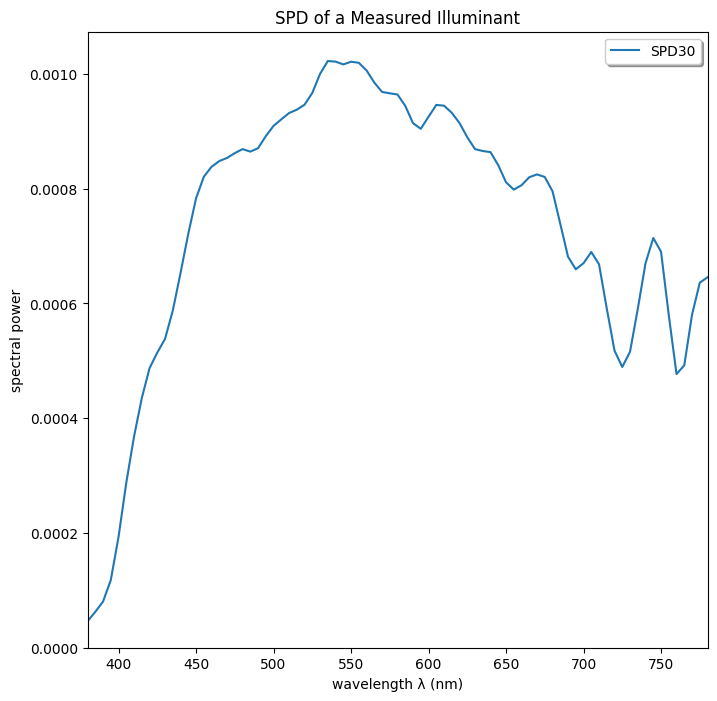

In [75]:
file_spd = ["res", "spd", "INDIGO-C7000-A_030_02°_5027K.csv"]
path_spd = os.path.join(*file_spd)

IN30 = MeasuredIlluminant(illuminant_name="IN-30", path_file=path_spd)

IN30.plot()

XYZ data (under IN-30)

In [76]:
CCDSG_XYZ_IN30 = CCDSG.to_ColourCheckerXYZ(illuminant=IN30, observer=2).as_pandas_dataframe()

In [77]:
CCC_XYZ_IN30 = CCC.to_ColourCheckerXYZ(illuminant=IN30, observer=2).as_pandas_dataframe()

In [79]:
XRCCPP_XYZ_IN30 = XRCCPP.to_ColourCheckerXYZ(illuminant=IN30, observer=2).as_pandas_dataframe()

In [80]:
SCK100_XYZ_IN30 = SCK100.to_ColourCheckerXYZ(illuminant=IN30, observer=2).as_pandas_dataframe()

## RawImage

### CCDSG

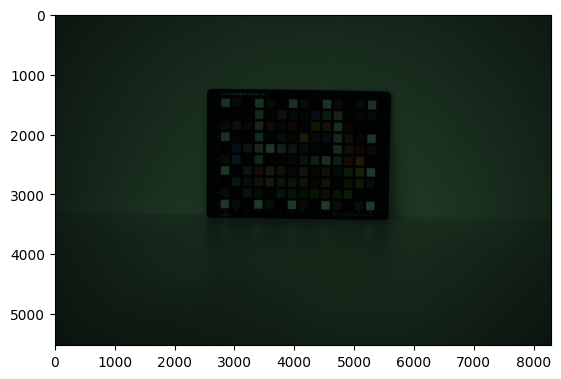

In [81]:
file_raw_0014i = ["data", "NikonZ7ii", "Indoor", "IN30", "INDIGO_2022-05-25_Z7ii-A_0014.NEF"]
path_raw_0014i= os.path.join(*file_raw_0014i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "CCDSG", "Illuminant": IN30, "Observer":2}
image_0014i = RawImage(path_raw_0014i, metadata, method="postprocess")

image_0014i.show(method="matplotlib")

RAW RGB data extraction

In [82]:
has_colourchecker, corners, size_rect = image_0014i.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

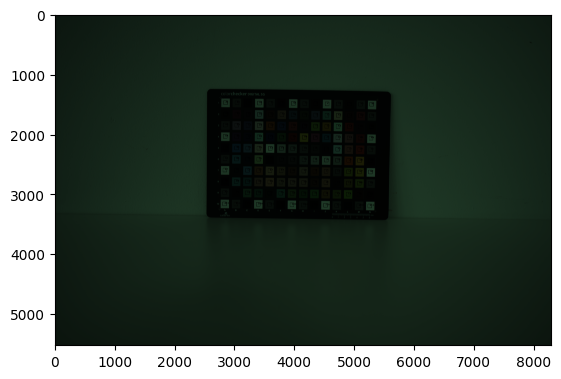

In [83]:
image_0014i.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [84]:
CCDSG_RGB_IN30 = image_0014i.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [85]:
data_ccdsg_in30 = pd.merge(CCDSG_XYZ_IN30, CCDSG_RGB_IN30, on="patch_id")
data_ccdsg_in30.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_in30

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD30.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD30.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD30.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD30.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD30.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD30.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD30.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD30.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD30.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD30.   

             X          Y          Z  \
0    84.836493  90.860950  69.497729   
1     4.126463   4.393036   3.438036   
2    20.650434  22.093972  17.137087   
3    83.846162  89.800697  68.815928   
4     4.111348   4.378228   3.429316   
..         ...        ...        ...   
135   4.107847   4.375125   3.426922   
136  84.299873  90.285197  69.155302   
137  20.708159  22.153267  17.158751   
138   4.083214   4.347660   3.397135   
139  84.845447  90.865929  69.493934   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD30.  1663.657227  3047.307617   
1    MeasuredIlluminant object: Illuminant SPD30.    71.817383   134.752930   
2    MeasuredIlluminant object: Illuminant SPD30.   414.806641   765.302734   
3    MeasuredIlluminant object: Illuminant SPD30.  1774.486816  3249.082520   
4    MeasuredIlluminant object: Illuminant SPD30.    63.239746   118.343018   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD30.    70.695312   128.054688   
136  MeasuredIlluminant object: Illuminant SPD30.  1972.294434  3601.857910   
137  MeasuredIlluminant object: Illuminant SPD30.   463.813232   848.361084   
138  MeasuredIlluminant object: Illuminant SPD30.    66.749512   120.558594   
139  MeasuredIlluminant object: Illuminant SPD30.  1996.496338  3654.354980   

               B  
0    2082.119141  
1      93.476562  
2     523.257812  
3    2219.165527  
4      82.033203  
..           ...  
135    87.342773  
136  2452.591309  
137   579.317627  
138    81.761230  
139  2490.854004  

[140 rows x 10 columns]

In [86]:
data_ccdsg_in30 = data_ccdsg_in30[(data_ccdsg_in30["patch_id"].str.contains("1")==False) & (data_ccdsg_in30["patch_id"].str.contains("0")==False) & (data_ccdsg_in30["patch_id"].str.contains("0")==False) & (data_ccdsg_in30["patch_id"].str.contains("A")==False) & (data_ccdsg_in30["patch_id"].str.contains("N")==False)]
data_ccdsg_in30

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD30.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD30.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD30.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD30.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD30.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD30.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD30.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD30.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD30.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD30.   

             X          Y          Z  \
11   16.377528  10.774730  11.100460   
12   37.531572  32.560233  36.163229   
13   14.257916   9.587453  19.611997   
14   17.314685  21.046111  43.334406   
15   22.972847  31.625074  41.079331   
..         ...        ...        ...   
124  37.366177  22.929633   5.851314   
125  67.048419  61.464276   7.898556   
126  60.174763  62.127914   6.281013   
127  37.044432  44.911189   6.641758   
128   7.096644   6.664836   3.718302   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD30.   400.471191   254.055664   
12   MeasuredIlluminant object: Illuminant SPD30.   835.169922  1082.323730   
13   MeasuredIlluminant object: Illuminant SPD30.   295.383789   279.721191   
14   MeasuredIlluminant object: Illuminant SPD30.   247.957764  1016.540039   
15   MeasuredIlluminant object: Illuminant SPD30.   384.906250  1465.439941   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD30.  1176.431641   447.809570   
125  MeasuredIlluminant object: Illuminant SPD30.  1745.375000  1801.904785   
126  MeasuredIlluminant object: Illuminant SPD30.  1538.497070  2025.784180   
127  MeasuredIlluminant object: Illuminant SPD30.   844.627930  1621.922363   
128  MeasuredIlluminant object: Illuminant SPD30.   155.557129   177.310547   

               B  
11    272.978516  
12   1030.363281  
13    466.716309  
14   1297.700684  
15   1360.066650  
..           ...  
124   197.064453  
125   359.644531  
126   337.136719  
127   334.326660  
128    93.876465  

[96 rows x 10 columns]

### WPP

White - E5

In [88]:
patch_max = find_patch_max_value(data_ccdsg_in30)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [89]:
data_ccdsg_in30 = apply_wpp(data_ccdsg_in30, "E5")
data_ccdsg_in30

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD30.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD30.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD30.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD30.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD30.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD30.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD30.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD30.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD30.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD30.   

            X         Y         Z  \
11   0.192935  0.118528  0.159800   
12   0.442141  0.358180  0.520598   
13   0.167965  0.105467  0.282330   
14   0.203976  0.231519  0.623832   
15   0.270632  0.347893  0.591369   
..        ...       ...       ...   
124  0.440192  0.252238  0.084234   
125  0.789864  0.676141  0.113706   
126  0.708889  0.683441  0.090420   
127  0.436402  0.494048  0.095613   
128  0.083602  0.073317  0.053528   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD30.  0.210269  0.072811   
12   MeasuredIlluminant object: Illuminant SPD30.  0.438509  0.310186   
13   MeasuredIlluminant object: Illuminant SPD30.  0.155092  0.080166   
14   MeasuredIlluminant object: Illuminant SPD30.  0.130191  0.291333   
15   MeasuredIlluminant object: Illuminant SPD30.  0.202096  0.419985   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD30.  0.617689  0.128339   
125  MeasuredIlluminant object: Illuminant SPD30.  0.916415  0.516413   
126  MeasuredIlluminant object: Illuminant SPD30.  0.807793  0.580576   
127  MeasuredIlluminant object: Illuminant SPD30.  0.443475  0.464832   
128  MeasuredIlluminant object: Illuminant SPD30.  0.081676  0.050816   

            B  
11   0.114633  
12   0.432683  
13   0.195989  
14   0.544947  
15   0.571136  
..        ...  
124  0.082754  
125  0.151026  
126  0.141575  
127  0.140395  
128  0.039422  

[96 rows x 10 columns]

In [90]:
data_ccdsg_in30.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.359942   0.344003   0.286661   0.373998   0.319328   0.283088
std     0.227594   0.222694   0.235578   0.253676   0.223625   0.230587
min     0.048313   0.048041   0.049223   0.027881   0.027626   0.027307
25%     0.160474   0.159688   0.099163   0.142396   0.127171   0.110780
50%     0.334240   0.347479   0.211465   0.360907   0.297626   0.204373
75%     0.475976   0.465504   0.410628   0.549323   0.421938   0.387267
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [91]:
data_wpp_in30.append(data_ccdsg_in30)

### CCC

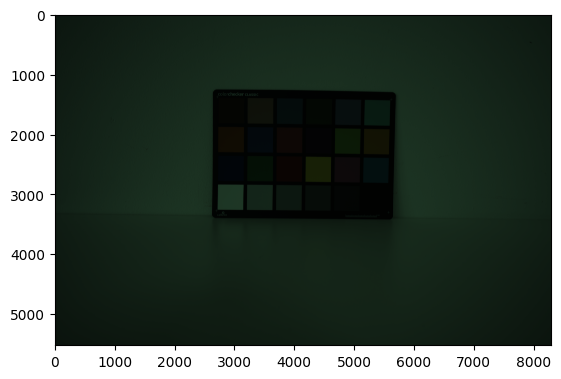

In [92]:
file_raw_0013i =  ["data", "NikonZ7ii", "Indoor", "IN30", "INDIGO_2022-05-25_Z7ii-A_0013.NEF"]
path_raw_0013i = os.path.join(*file_raw_0013i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "CCC", "Illuminant": IN30, "Observer":2}
image_0013i = RawImage(path_raw_0013i, metadata, method="postprocess")

image_0013i.show(method="matplotlib")

RAW RGB data extraction

In [93]:
has_colourchecker, corners, size_rect = image_0013i.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

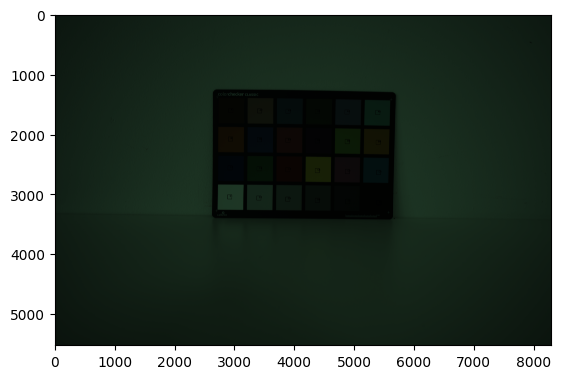

In [94]:
image_0013i.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [95]:
CCC_RGB_IN30 = image_0013i.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [96]:
data_ccc_in30 = pd.merge(CCC_XYZ_IN30, CCC_RGB_IN30, on="patch_id")
data_ccc_in30.insert(0, "ColourChecker", "CCC")
data_ccc_in30

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD30.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD30.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD30.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD30.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD30.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD30.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD30.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD30.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD30.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD30.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD30.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD30.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD30.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD30.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD30.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD30.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD30.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD30.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD30.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD30.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD30.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD30.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD30.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD30.   

            X          Y          Z  \
0   12.173318  11.039005   5.319430   
1   38.631072  35.577218  18.735163   
2   17.262658  19.206430  25.734019   
3   11.390687  14.172897   5.443420   
4   24.591684  24.099450  32.903869   
5   31.195518  43.575768  34.198460   
6   40.809006  32.257516   5.068241   
7   12.348385  11.771205  29.108208   
8   29.740816  20.002465   9.995411   
9    8.605922   6.681557  10.683092   
10  35.704886  46.262365   9.065085   
11  48.842684  44.851650   6.108459   
12   7.173223   6.218398  20.882713   
13  15.177848  24.255145   7.842704   
14  21.850582  13.406622   4.121952   
15  59.676237  62.617672   7.431577   
16  30.443732  20.546382  22.836896   
17  13.745178  19.847534  29.853079   
18  86.017731  92.138315  70.309839   
19  56.609743  60.886491  47.717510   
20  35.173189  37.869899  29.893844   
21  18.873093  20.228368  15.808865   
22   8.936754   9.622024   7.694991   
23   3.187191   3.411974   2.723673   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD30.   284.882330   336.463735   
1   MeasuredIlluminant object: Illuminant SPD30.   915.643904  1085.035108   
2   MeasuredIlluminant object: Illuminant SPD30.   315.708333   774.212963   
3   MeasuredIlluminant object: Illuminant SPD30.   234.298611   507.301698   
4   MeasuredIlluminant object: Illuminant SPD30.   504.802855   929.518519   
5   MeasuredIlluminant object: Illuminant SPD30.   544.662809  1702.592593   
6   MeasuredIlluminant object: Illuminant SPD30.  1038.463349   774.054012   
7   MeasuredIlluminant object: Illuminant SPD30.   214.499228   574.604167   
8   MeasuredIlluminant object: Illuminant SPD30.   853.444059   497.202932   
9   MeasuredIlluminant object: Illuminant SPD30.   202.192323   246.803048   
10  MeasuredIlluminant object: Illuminant SPD30.   755.250772  1622.603395   
11  MeasuredIlluminant object: Illuminant SPD30.  1180.122299  1212.714506   
12  MeasuredIlluminant object: Illuminant SPD30.   119.792824   341.580247   
13  MeasuredIlluminant object: Illuminant SPD30.   303.8451

### WPP

White - D1

In [98]:
patch_max = find_patch_max_value(data_ccc_in30)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [99]:
data_ccc_in30 = apply_wpp(data_ccc_in30, "D1")
data_ccc_in30

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD30.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD30.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD30.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD30.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD30.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD30.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD30.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD30.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD30.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD30.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD30.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD30.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD30.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD30.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD30.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD30.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD30.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD30.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD30.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD30.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD30.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD30.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD30.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD30.   

           X         Y         Z  \
0   0.141521  0.119809  0.075657   
1   0.449106  0.386128  0.266466   
2   0.200687  0.208452  0.366009   
3   0.132423  0.153822  0.077420   
4   0.285891  0.261557  0.467984   
5   0.362664  0.472939  0.486397   
6   0.474426  0.350099  0.072084   
7   0.143556  0.127756  0.413999   
8   0.345752  0.217092  0.142162   
9   0.100048  0.072517  0.151943   
10  0.415088  0.502097  0.128931   
11  0.567821  0.486786  0.086879   
12  0.083392  0.067490  0.297010   
13  0.176450  0.263247  0.111545   
14  0.254024  0.145505  0.058626   
15  0.693767  0.679605  0.105698   
16  0.353924  0.222995  0.324804   
17  0.159795  0.215410  0.424593   
18  1.000000  1.000000  1.000000   
19  0.658117  0.660816  0.678675   
20  0.408906  0.411011  0.425173   
21  0.219409  0.219544  0.224846   
22  0.103894  0.104430  0.109444   
23  0.037053  0.037031  0.038738   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD30.  0.148533  0.096437  0.077620  
1   MeasuredIlluminant object: Illuminant SPD30.  0.477401  0.310992  0.268122  
2   MeasuredIlluminant object: Illuminant SPD30.  0.164605  0.221904  0.317019  
3   MeasuredIlluminant object: Illuminant SPD30.  0.122159  0.145402  0.089813  
4   MeasuredIlluminant object: Illuminant SPD30.  0.263196  0.266418  0.394518  
5   MeasuredIlluminant object: Illuminant SPD30.  0.283978  0.487996  0.476930  
6   MeasuredIlluminant object: Illuminant SPD30.  0.541437  0.221859  0.091429  
7   MeasuredIlluminant object: Illuminant SPD30.  0.111836  0.164693  0.345496  
8   MeasuredIlluminant object: Illuminant SPD30.  0.444971  0.142508  0.137101  
9   MeasuredIlluminant object: Illuminant SPD30.  0.105420  0.070738  0.123353  
10  MeasuredIlluminant object: Illuminant SPD30.  0.393775  0.465069  0.189391  
11  MeasuredIlluminant object: Illuminant SPD30.  0.615296  0.347587  0.114134  
12  MeasuredIlluminant object: Illuminant SPD30.  0.062458  0.097903  0.244097  
13  MeasuredIlluminant object: Illuminant SPD30.  0.158420  0.293801  0.161254  
14  Measure

In [100]:
data_ccc_in30.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.323655   0.307756   0.272295   0.335122   0.289267   0.269959
std     0.232571   0.233029   0.232502   0.251605   0.226832   0.222112
min     0.037053   0.037031   0.038738   0.038615   0.039247   0.040644
25%     0.143047   0.141068   0.100993   0.121071   0.133163   0.112509
50%     0.269958   0.221269   0.188394   0.273587   0.224020   0.208572
75%     0.423592   0.426493   0.416648   0.453079   0.367804   0.357751
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [101]:
data_wpp_in30.append(data_ccc_in30)

### XRCCPP

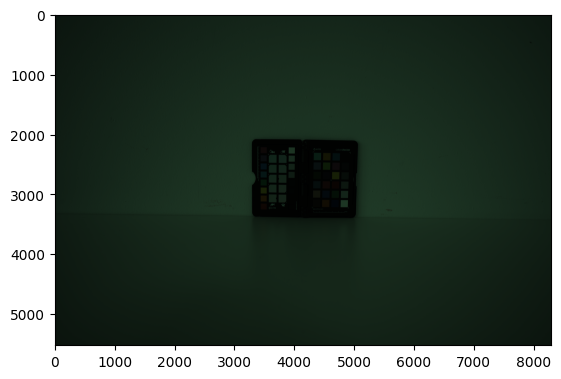

In [112]:
file_raw_0017i =  ["data", "NikonZ7ii", "Indoor", "IN30", "INDIGO_2022-05-25_Z7ii-A_0017.NEF"]
path_raw_0017i = os.path.join(*file_raw_0017i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "XRCCPP", "Illuminant": IN30, "Observer":2}
image_0017i = RawImage(path_raw_0017i, metadata, method="postprocess")

image_0017i.show(method="matplotlib")

RAW RGB data extraction

In [113]:
has_colourchecker, corners, size_rect = image_0017i.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

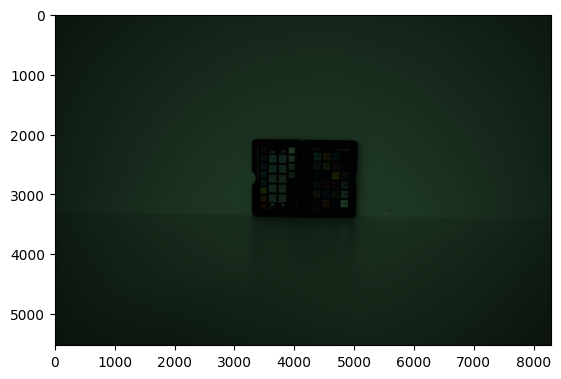

In [114]:
image_0017i.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [115]:
XRCCPP_RGB_IN30 = image_0017i.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [116]:
data_xrccpp_in30 = pd.merge(XRCCPP_XYZ_IN30, XRCCPP_RGB_IN30, on="patch_id")
data_xrccpp_in30.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_in30

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD30.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD30.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD30.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD30.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD30.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD30.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD30.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD30.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD30.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD30.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD30.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD30.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD30.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD30.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD30.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD30.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD30.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD30.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD30.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD30.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD30.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD30.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD30.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD30.   

            X          Y          Z  \
0   11.698494  10.679990   5.207890   
1   36.932098  33.668799  17.713144   
2   15.280546  16.971599  22.597139   
3   10.433615  12.948453   5.189166   
4   21.216115  20.982333  28.283729   
5   29.303169  41.260135  32.791306   
6   38.082729  30.279433   4.906219   
7   12.084309  11.571858  27.866813   
8   28.370786  19.057974   9.620428   
9    8.224462   6.467641  10.135305   
10  31.981805  41.295578   8.210471   
11  43.783911  40.479836   5.770091   
12   6.182931   5.588070  16.008321   
13  14.093336  22.327551   7.443878   
14  20.207792  12.322299   3.774287   
15  51.813995  54.681769   6.594714   
16  27.436660  18.576919  20.533522   
17  12.788820  18.394267  27.640751   
18  75.091982  80.529654  60.474398   
19  52.044543  55.917348  43.745952   
20  31.592283  33.998764  26.752185   
21  17.593184  18.892859  14.749533   
22   7.539677   8.139659   6.598929   
23   3.114186   3.344997   2.737984   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD30.   312.409091   371.739669   
1   MeasuredIlluminant object: Illuminant SPD30.  1019.911157  1178.438017   
2   MeasuredIlluminant object: Illuminant SPD30.   348.334711   850.260331   
3   MeasuredIlluminant object: Illuminant SPD30.   256.694215   548.491736   
4   MeasuredIlluminant object: Illuminant SPD30.   529.483471  1002.276860   
5   MeasuredIlluminant object: Illuminant SPD30.   573.789256  1841.553719   
6   MeasuredIlluminant object: Illuminant SPD30.  1113.297521   835.752066   
7   MeasuredIlluminant object: Illuminant SPD30.   227.619835   610.958678   
8   MeasuredIlluminant object: Illuminant SPD30.   881.818182   504.954545   
9   MeasuredIlluminant object: Illuminant SPD30.   220.855372   277.190083   
10  MeasuredIlluminant object: Illuminant SPD30.   804.442149  1726.896694   
11  MeasuredIlluminant object: Illuminant SPD30.  1226.537190  1300.983471   
12  MeasuredIlluminant object: Illuminant SPD30.   118.479339   355.561983   
13  MeasuredIlluminant object: Illuminant SPD30.   303.8739

### WPP

White - D1

In [118]:
patch_max = find_patch_max_value(data_xrccpp_in30)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [119]:
data_xrccpp_in30 = apply_wpp(data_xrccpp_in30, "D1")
data_xrccpp_in30

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD30.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD30.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD30.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD30.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD30.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD30.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD30.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD30.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD30.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD30.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD30.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD30.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD30.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD30.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD30.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD30.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD30.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD30.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD30.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD30.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD30.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD30.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD30.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD30.   

           X         Y         Z  \
0   0.155789  0.132622  0.086117   
1   0.491825  0.418092  0.292903   
2   0.203491  0.210750  0.373665   
3   0.138944  0.160791  0.085808   
4   0.282535  0.260554  0.467698   
5   0.390230  0.512360  0.542235   
6   0.507148  0.376004  0.081129   
7   0.160927  0.143697  0.460803   
8   0.377814  0.236658  0.159083   
9   0.109525  0.080314  0.167597   
10  0.425902  0.512800  0.135768   
11  0.583070  0.502670  0.095414   
12  0.082338  0.069391  0.264712   
13  0.187681  0.277259  0.123091   
14  0.269107  0.153016  0.062411   
15  0.690007  0.679026  0.109050   
16  0.365374  0.230684  0.339541   
17  0.170309  0.228416  0.457065   
18  1.000000  1.000000  1.000000   
19  0.693077  0.694370  0.723380   
20  0.420714  0.422189  0.442372   
21  0.234288  0.234607  0.243897   
22  0.100406  0.101077  0.109119   
23  0.041472  0.041537  0.045275   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD30.  0.162803  0.106277  0.086642  
1   MeasuredIlluminant object: Illuminant SPD30.  0.531498  0.336906  0.300713  
2   MeasuredIlluminant object: Illuminant SPD30.  0.181525  0.243083  0.347776  
3   MeasuredIlluminant object: Illuminant SPD30.  0.133769  0.156809  0.100542  
4   MeasuredIlluminant object: Illuminant SPD30.  0.275925  0.286543  0.424730  
5   MeasuredIlluminant object: Illuminant SPD30.  0.299014  0.526486  0.523104  
6   MeasuredIlluminant object: Illuminant SPD30.  0.580163  0.238935  0.098929  
7   MeasuredIlluminant object: Illuminant SPD30.  0.118618  0.174668  0.369906  
8   MeasuredIlluminant object: Illuminant SPD30.  0.459534  0.144363  0.142691  
9   MeasuredIlluminant object: Illuminant SPD30.  0.115092  0.079246  0.136532  
10  MeasuredIlluminant object: Illuminant SPD30.  0.419212  0.493706  0.206437  
11  MeasuredIlluminant object: Illuminant SPD30.  0.639175  0.371941  0.131194  
12  MeasuredIlluminant object: Illuminant SPD30.  0.061742  0.101652  0.267528  
13  MeasuredIlluminant object: Illuminant SPD30.  0.158355  0.291918  0.165267  
14  Measure

In [120]:
data_xrccpp_in30.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.336749   0.319953   0.286172   0.343599   0.297597   0.281567
std     0.235323   0.235468   0.238196   0.251452   0.226416   0.222944
min     0.041472   0.041537   0.045275   0.042323   0.043738   0.046424
25%     0.159642   0.150686   0.105641   0.130716   0.135335   0.126559
50%     0.275821   0.235633   0.205747   0.287470   0.241009   0.216539
75%     0.442382   0.442310   0.446045   0.477525   0.384751   0.383612
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [121]:
data_wpp_in30.append(data_xrccpp_in30)

### SCK100

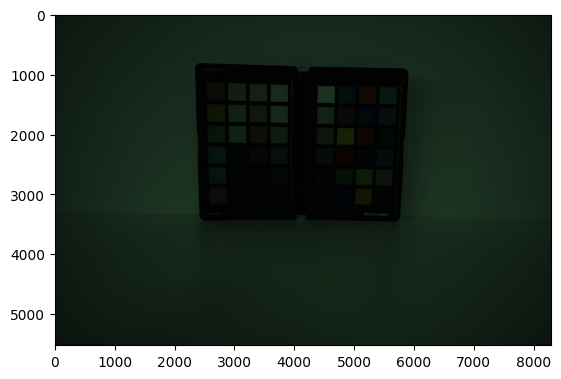

In [122]:
file_raw_0015i =  ["data", "NikonZ7ii", "Indoor", "IN30", "INDIGO_2022-05-25_Z7ii-A_0015.NEF"]
path_raw_0015i = os.path.join(*file_raw_0015i)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 25], [17, 30, 00]], "ColourChecker": "SCK100", "Illuminant": IN30, "Observer":2}
image_0015i = RawImage(path_raw_0015i, metadata, method="postprocess")

image_0015i.show(method="matplotlib")

RAW RGB data extraction

In [123]:
has_colourchecker, corners, size_rect = image_0015i.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

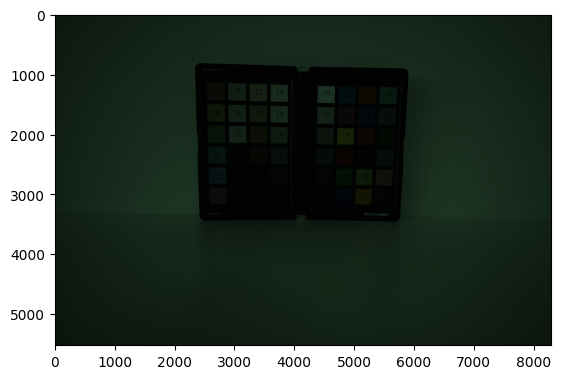

In [124]:
image_0015i.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [125]:
SCK100_RGB_IN30 = image_0015i.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [126]:
data_sck100_in30 = pd.merge(SCK100_XYZ_IN30, SCK100_RGB_IN30, on="patch_id")
data_sck100_in30.insert(0, "ColourChecker", "SCK100")
data_sck100_in30

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD30.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD30.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD30.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD30.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD30.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD30.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD30.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD30.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD30.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD30.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD30.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD30.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD30.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD30.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD30.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD30.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD30.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD30.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD30.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD30.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD30.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD30.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD30.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD30.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD30.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD30.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD30.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD30.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD30.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD30.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD30.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD30.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD30.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD30.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD30.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD30.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD30.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD30.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD30.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD30.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD30.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD30.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD30.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD30.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD30.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD30.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD30.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD30.   

            X          Y          Z  \
0   35.935442  29.004324  15.264902   
1   46.847074  48.446954  12.814035   
2   26.813070  35.971879  16.996695   
3   23.481348  30.558819  36.285091   
4   25.126784  27.767891  39.297585   
5   33.506072  27.245769  24.387893   
6   57.591902  60.100134  45.420636   
7   54.718241  

### WPP

White - E1

In [128]:
patch_max = find_patch_max_value(data_sck100_in30)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [129]:
data_sck100_in30 = apply_wpp(data_sck100_in30, "E1")
data_sck100_in30

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD30.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD30.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD30.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD30.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD30.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD30.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD30.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD30.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD30.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD30.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD30.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD30.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD30.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD30.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD30.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD30.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD30.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD30.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD30.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD30.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD30.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD30.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD30.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD30.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD30.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD30.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD30.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD30.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD30.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD30.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD30.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD30.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD30.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD30.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD30.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD30.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD30.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD30.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD30.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD30.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD30.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD30.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD30.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD30.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD30.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD30.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD30.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD30.   

           X         Y         Z  \
0   0.428302  0.323571  0.222136   
1   0.558353  0.540473  0.186471   
2   0.319575  0.401301  0.247337   
3   0.279866  0.340913  0.528023   
4   0.299477  0.309778  0.571861   
5   0.399347  0.303953  0.354894   
6   0.686417  0.670475  0.660964   
7   0.652167  0.669562  0.649612   
8  

In [130]:
data_sck100_in30.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.353528   0.340810   0.304773   0.365868   0.325425   0.304429
std     0.251081   0.249376   0.249945   0.260140   0.238919   0.237337
min     0.046999   0.047123   0.048537   0.041721   0.042555   0.043312
25%     0.136334   0.136837   0.084420   0.116935   0.125330   0.101664
50%     0.309526   0.294472   0.234736   0.291576   0.280159   0.250054
75%     0.518907   0.494464   0.462519   0.546147   0.467846   0.435478
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [131]:
data_wpp_in30.append(data_sck100_in30)

## Merge data

In [133]:
data_pd_wpp_in30 = pd.concat(data_wpp_in30, ignore_index=True)

data_pd_wpp_in30 = data_pd_wpp_in30.drop(columns="illuminant_y")
data_pd_wpp_in30 = data_pd_wpp_in30.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_in30["illuminant"] = "IN-30" # as str to avoid error
data_pd_wpp_in30

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD30  0.192935  0.118528  0.159800  0.210269   
1           CCDSG       B3      SPD30  0.442141  0.358180  0.520598  0.438509   
2           CCDSG       B4      SPD30  0.167965  0.105467  0.282330  0.155092   
3           CCDSG       B5      SPD30  0.203976  0.231519  0.623832  0.130191   
4           CCDSG       B6      SPD30  0.270632  0.347893  0.591369  0.202096   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD30  0.283582  0.263592  0.467054  0.267180   
212        SCK100       H3      SPD30  0.123951  0.146873  0.076210  0.117339   
213        SCK100       H4      SPD30  0.197671  0.209186  0.362321  0.175211   
214        SCK100       H5      SPD30  0.448790  0.388078  0.266406  0.563394   
215        SCK100       H6      SPD30  0.131578  0.110571  0.070666  0.157547   

            G         B  
0    0.072811  0.114633  
1    0.310186  0.432683  
2    0.080166  0.195989  
3    0.291333  0.544947  
4    0.419985  0.571136  
..        ...       ...  
211  0.281078  0.420568  
212  0.145024  0.084143  
213  0.248535  0.348109  
214  0.366681  0.311209  
215  0.092181  0.070239  

[216 rows x 9 columns]

## Outdoor

In [134]:
data_wpp_out38 = []

## OUT-38

| Image                             |  Illuminant   | ColourChecker                        | Patches |
|-----------------------------------|---------------|--------------------------------------|---------|
| INDIGO_2022-05-26_Z7ii-A_0002.NEF | OUT-38-5557ºK | CCDSG  - Calibrite DIGITAL SG        | 96      |
| INDIGO_2022-05-26_Z7ii-A_0001.NEF | OUT-38-5557ºK | CCC - Calibrite Classic              | 24      |
| INDIGO_2022-05-26_Z7ii-A_0005.NEF | OUT-38-5557ºK | XRCCPP - X-rite PASSPORT PHOTO       | 24      |
| INDIGO_2022-05-26_Z7ii-A_0003.NEF | OUT-38-5557ºK | SCK100 - SpyderCHECKR                | 48      |

<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0002.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0001.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0005.jpg" width="500">
<img src="res/screenshot/NikonZ7ii/SPD38/INDIGO_2022-05-26_Z7ii-A_0003.jpg" width="500">

## SPD Illuminant

OUT-38

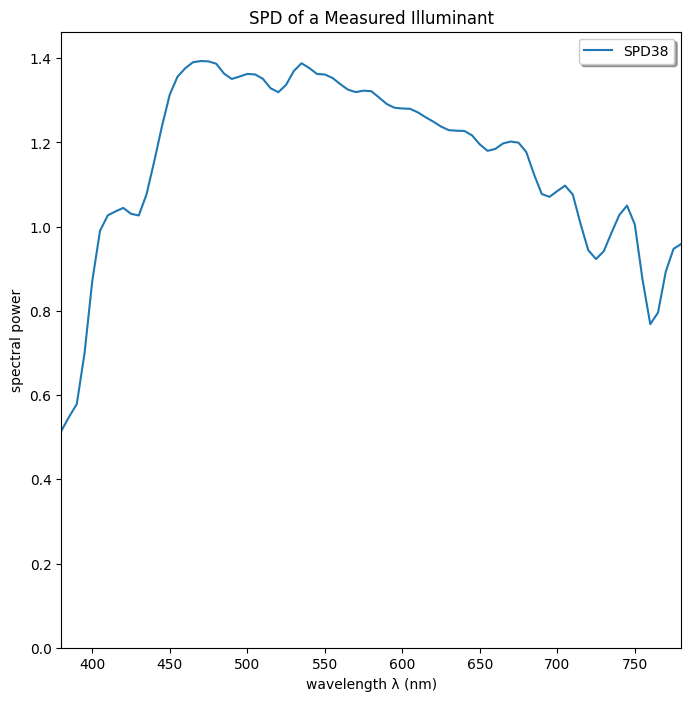

In [135]:
file_spd = ["res", "spd", "INDIGO-C7000-A_038_02°_5557K.csv"]
path_spd = os.path.join(*file_spd)

OUT38 = MeasuredIlluminant(illuminant_name="OUT-38", path_file=path_spd)

OUT38.plot()

XYZ data (under OUT-38)

In [136]:
CCDSG_XYZ_OUT38 = CCDSG.to_ColourCheckerXYZ(illuminant=OUT38, observer=2).as_pandas_dataframe()

In [137]:
CCC_XYZ_OUT38 = CCC.to_ColourCheckerXYZ(illuminant=OUT38, observer=2).as_pandas_dataframe()

In [139]:
XRCCPP_XYZ_OUT38 = XRCCPP.to_ColourCheckerXYZ(illuminant=OUT38, observer=2).as_pandas_dataframe()

In [140]:
SCK100_XYZ_OUT38 = SCK100.to_ColourCheckerXYZ(illuminant=OUT38, observer=2).as_pandas_dataframe()

## RawImage

### CCDSG

In [141]:
file_raw_0002o =  ["data", "NikonZ7ii", "Outdoor", "OUT38", "INDIGO_2022-05-26_Z7ii-A_0002.NEF"]
path_raw_0002o= os.path.join(*file_raw_0002o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "CCDSG", "Illuminant": OUT38, "Observer":2}
image_0002o = RawImage(path_raw_0002o, metadata, method="postprocess")

image_0002o.show(method="matplotlib")

RAW RGB data extraction

In [142]:
has_colourchecker, corners, size_rect = image_0002o.automatic_colourchecker_extraction(checker_name="CCDSG", opencv_descriptor="SIFT")

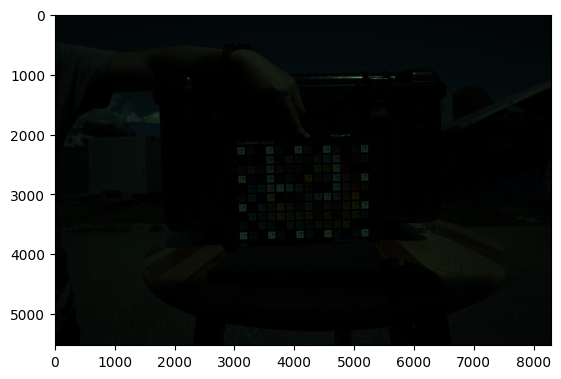

In [143]:
image_0002o.show_colourchecker(checker_name="CCDSG", show_image=True, method="matplotlib")

In [144]:
CCDSG_RGB_OUT38 = image_0002o.get_ColourCheckerRGB("CCDSG").as_pandas_dataframe()

In [145]:
data_ccdsg_spd38 = pd.merge(CCDSG_XYZ_OUT38, CCDSG_RGB_OUT38, on="patch_id")
data_ccdsg_spd38.insert(0, "ColourChecker", "CCDSG")
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
0           CCDSG       A1  MeasuredIlluminant object: Illuminant SPD38.   
1           CCDSG       A2  MeasuredIlluminant object: Illuminant SPD38.   
2           CCDSG       A3  MeasuredIlluminant object: Illuminant SPD38.   
3           CCDSG       A4  MeasuredIlluminant object: Illuminant SPD38.   
4           CCDSG       A5  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
135         CCDSG       N6  MeasuredIlluminant object: Illuminant SPD38.   
136         CCDSG       N7  MeasuredIlluminant object: Illuminant SPD38.   
137         CCDSG       N8  MeasuredIlluminant object: Illuminant SPD38.   
138         CCDSG       N9  MeasuredIlluminant object: Illuminant SPD38.   
139         CCDSG      N10  MeasuredIlluminant object: Illuminant SPD38.   

             X          Y          Z  \
0    87.300586  90.859164  85.223169   
1     4.253752   4.393613   4.236990   
2    21.267657  22.091132  21.075288   
3    86.287721  89.800334  84.392373   
4     4.238284   4.378805   4.226200   
..         ...        ...        ...   
135   4.234712   4.375731   4.223337   
136  86.752339  90.284485  84.802768   
137  21.325868  22.150208  21.100860   
138   4.208917   4.348210   4.186358   
139  87.308443  90.864186  85.213431   

                                     illuminant_y            R            G  \
0    MeasuredIlluminant object: Illuminant SPD38.  1392.897805  2501.514403   
1    MeasuredIlluminant object: Illuminant SPD38.    14.425926    25.088820   
2    MeasuredIlluminant object: Illuminant SPD38.   316.563786   564.065844   
3    MeasuredIlluminant object: Illuminant SPD38.  1497.099451  2661.797668   
4    MeasuredIlluminant object: Illuminant SPD38.    13.846365    24.318244   
..                                            ...          ...          ...   
135  MeasuredIlluminant object: Illuminant SPD38.    15.610425    25.385460   
136  MeasuredIlluminant object: Illuminant SPD38.  1620.304527  2819.577503   
137  MeasuredIlluminant object: Illuminant SPD38.   357.025377   618.766804   
138  MeasuredIlluminant object: Illuminant SPD38.    21.914609    31.438272   
139  MeasuredIlluminant object: Illuminant SPD38.  1592.720165  2767.854595   

               B  
0    1930.602881  
1      20.801440  
2     435.495885  
3    2045.952675  
4      20.190672  
..           ...  
135    19.194787  
136  2122.951989  
137   463.155007  
138    20.664609  
139  2085.581619  

[140 rows x 10 columns]

In [146]:
data_ccdsg_spd38 = data_ccdsg_spd38[(data_ccdsg_spd38["patch_id"].str.contains("1")==False) & (data_ccdsg_spd38["patch_id"].str.contains("0")==False) & (data_ccdsg_spd38["patch_id"].str.contains("0")==False) & (data_ccdsg_spd38["patch_id"].str.contains("A")==False) & (data_ccdsg_spd38["patch_id"].str.contains("N")==False)]
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD38.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD38.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD38.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD38.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD38.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD38.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD38.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD38.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD38.   

             X          Y          Z  \
11   17.019386  10.871192  14.000805   
12   39.099460  32.775758  44.825191   
13   15.293600   9.750916  24.760794   
14   18.983367  21.458387  53.076720   
15   24.444401  31.933887  50.187256   
..         ...        ...        ...   
124  37.788664  22.981807   7.227809   
125  67.116006  60.837795   9.551035   
126  60.092033  61.398777   7.500841   
127  36.953162  44.348139   7.899924   
128   7.228876   6.653069   4.577279   

                                     illuminant_y            R            G  \
11   MeasuredIlluminant object: Illuminant SPD38.   307.319616   142.462277   
12   MeasuredIlluminant object: Illuminant SPD38.   685.965706   853.670782   
13   MeasuredIlluminant object: Illuminant SPD38.   213.242112   169.631001   
14   MeasuredIlluminant object: Illuminant SPD38.   188.746228   823.446502   
15   MeasuredIlluminant object: Illuminant SPD38.   304.471879  1182.267490   
..                                            ...          ...          ...   
124  MeasuredIlluminant object: Illuminant SPD38.   927.065158   277.163237   
125  MeasuredIlluminant object: Illuminant SPD38.  1380.766804  1313.980110   
126  MeasuredIlluminant object: Illuminant SPD38.  1202.709191  1469.056241   
127  MeasuredIlluminant object: Illuminant SPD38.   643.056584  1154.519890   
128  MeasuredIlluminant object: Illuminant SPD38.    90.687243    73.175583   

               B  
11    209.135802  
12    934.134431  
13    390.564129  
14   1190.338820  
15   1231.111111  
..           ...  
124   116.253086  
125   250.323045  
126   221.348422  
127   221.228395  
128    30.846365  

[96 rows x 10 columns]

### WPP

White - E5

In [148]:
patch_max = find_patch_max_value(data_ccdsg_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E5', 'E5', 'E5']
['E5', 'E5', 'E5']


In [149]:
data_ccdsg_spd38 = apply_wpp(data_ccdsg_spd38, "E5")
data_ccdsg_spd38

ColourChecker patch_id                                  illuminant_x  \
11          CCDSG       B2  MeasuredIlluminant object: Illuminant SPD38.   
12          CCDSG       B3  MeasuredIlluminant object: Illuminant SPD38.   
13          CCDSG       B4  MeasuredIlluminant object: Illuminant SPD38.   
14          CCDSG       B5  MeasuredIlluminant object: Illuminant SPD38.   
15          CCDSG       B6  MeasuredIlluminant object: Illuminant SPD38.   
..            ...      ...                                           ...   
124         CCDSG       M5  MeasuredIlluminant object: Illuminant SPD38.   
125         CCDSG       M6  MeasuredIlluminant object: Illuminant SPD38.   
126         CCDSG       M7  MeasuredIlluminant object: Illuminant SPD38.   
127         CCDSG       M8  MeasuredIlluminant object: Illuminant SPD38.   
128         CCDSG       M9  MeasuredIlluminant object: Illuminant SPD38.   

            X         Y         Z  \
11   0.194845  0.119592  0.164366   
12   0.447627  0.360561  0.526236   
13   0.175087  0.107268  0.290685   
14   0.217329  0.236061  0.623106   
15   0.279850  0.351300  0.589185   
..        ...       ...       ...   
124  0.432620  0.252820  0.084853   
125  0.768372  0.669268  0.112127   
126  0.687958  0.675439  0.088058   
127  0.423055  0.487867  0.092743   
128  0.082759  0.073189  0.053736   

                                     illuminant_y         R         G  \
11   MeasuredIlluminant object: Illuminant SPD38.  0.199174  0.051679   
12   MeasuredIlluminant object: Illuminant SPD38.  0.444574  0.309673   
13   MeasuredIlluminant object: Illuminant SPD38.  0.138202  0.061534   
14   MeasuredIlluminant object: Illuminant SPD38.  0.122326  0.298709   
15   MeasuredIlluminant object: Illuminant SPD38.  0.197328  0.428873   
..                                            ...       ...       ...   
124  MeasuredIlluminant object: Illuminant SPD38.  0.600831  0.100542   
125  MeasuredIlluminant object: Illuminant SPD38.  0.894875  0.476652   
126  MeasuredIlluminant object: Illuminant SPD38.  0.779475  0.532906   
127  MeasuredIlluminant object: Illuminant SPD38.  0.416765  0.418807   
128  MeasuredIlluminant object: Illuminant SPD38.  0.058774  0.026545   

            B  
11   0.098346  
12   0.439275  
13   0.183662  
14   0.559755  
15   0.578928  
..        ...  
124  0.054668  
125  0.117714  
126  0.104089  
127  0.104032  
128  0.014505  

[96 rows x 10 columns]

In [150]:
data_ccdsg_spd38.describe()

X          Y          Z          R          G          B
count  96.000000  96.000000  96.000000  96.000000  96.000000  96.000000
mean    0.357907   0.343665   0.286503   0.354570   0.298543   0.262553
std     0.224927   0.221862   0.235864   0.254330   0.225069   0.235268
min     0.048401   0.048049   0.049471   0.009136   0.008643   0.009002
25%     0.163854   0.160395   0.098232   0.122996   0.100183   0.077089
50%     0.332046   0.349066   0.212210   0.340451   0.282037   0.188236
75%     0.469160   0.464864   0.414163   0.539224   0.417943   0.369152
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [151]:
data_wpp_spd38.append(data_ccdsg_spd38)

### CCC

In [152]:
file_raw_0001o = ["data", "NikonZ7ii", "Outdoor", "OUT38", "INDIGO_2022-05-26_Z7ii-A_0001.NEF"]
path_raw_0001o = os.path.join(*file_raw_0001o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "CCC", "Illuminant": OUT38, "Observer":2}
image_0001o = RawImage(path_raw_0001o, metadata, method="postprocess")

image_0001o.show(method="matplotlib")

RAW RGB data extraction

In [153]:
has_colourchecker, corners, size_rect = image_0001o.automatic_colourchecker_extraction(checker_name="CCC", opencv_descriptor="SIFT")

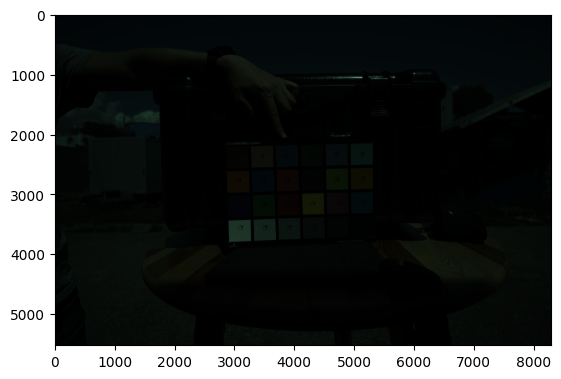

In [154]:
image_0001o.show_colourchecker(checker_name="CCC", show_image=True, method="matplotlib")

In [155]:
CCC_RGB_OUT38 = image_0001o.get_ColourCheckerRGB("CCC").as_pandas_dataframe()

In [156]:
data_ccc_spd38 = pd.merge(CCC_XYZ_OUT38, CCC_RGB_OUT38, on="patch_id")
data_ccc_spd38.insert(0, "ColourChecker", "CCC")
data_ccc_spd38

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD38.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD38.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD38.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD38.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD38.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD38.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD38.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD38.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD38.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD38.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD38.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD38.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD38.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD38.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD38.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD38.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD38.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD38.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD38.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD38.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD38.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD38.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD38.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   12.369534  11.020969   6.523938   
1   39.333099  35.619342  22.849698   
2   18.254646  19.353197  31.651975   
3   11.508979  14.068016   6.585266   
4   26.003395  24.310787  40.753356   
5   32.225671  43.617186  41.545436   
6   40.977732  32.096532   6.122255   
7   13.600697  12.006271  36.093387   
8   30.263797  20.064841  12.397939   
9    9.154945   6.766146  13.402739   
10  35.707385  45.820724  10.722548   
11  48.934797  44.447914   7.351591   
12   8.065072   6.408786  25.847637   
13  15.274113  24.078637   9.356271   
14  22.160468  13.463854   5.041435   
15  59.628191  62.000355   8.724007   
16  31.674082  20.743487  28.642231   
17  14.786041  20.137857  36.291046   
18  88.509572  92.133172  86.220458   
19  58.326315  60.888663  58.636759   
20  36.253784  37.870620  36.768782   
21  19.445270  20.226462  19.452563   
22   9.217833   9.622812   9.476507   
23   3.287971   3.412858   3.356818   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD38.   255.822222   284.164444   
1   MeasuredIlluminant object: Illuminant SPD38.   790.484444   898.997778   
2   MeasuredIlluminant object: Illuminant SPD38.   247.550556   619.244444   
3   MeasuredIlluminant object: Illuminant SPD38.   194.673889   406.019444   
4   MeasuredIlluminant object: Illuminant SPD38.   392.986667   710.097778   
5   MeasuredIlluminant object: Illuminant SPD38.   405.482222  1243.855556   
6   MeasuredIlluminant object: Illuminant SPD38.   964.268889   683.797778   
7   MeasuredIlluminant object: Illuminant SPD38.   177.684444   489.020000   
8   MeasuredIlluminant object: Illuminant SPD38.   721.428056   408.722778   
9   MeasuredIlluminant object: Illuminant SPD38.   140.716667   162.288333   
10  MeasuredIlluminant object: Illuminant SPD38.   565.656667  1165.955000   
11  MeasuredIlluminant object: Illuminant SPD38.   895.815556   855.356667   
12  MeasuredIlluminant object: Illuminant SPD38.    76.825000   243.242778   
13  MeasuredIlluminant object: Illuminant SPD38.   243.7983

### WPP

White - D1

In [158]:
patch_max = find_patch_max_value(data_ccc_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [159]:
data_ccc_spd38 = apply_wpp(data_ccc_spd38, "D1")
data_ccc_spd38

ColourChecker patch_id                                  illuminant_x  \
0            CCC       A1  MeasuredIlluminant object: Illuminant SPD38.   
1            CCC       A2  MeasuredIlluminant object: Illuminant SPD38.   
2            CCC       A3  MeasuredIlluminant object: Illuminant SPD38.   
3            CCC       A4  MeasuredIlluminant object: Illuminant SPD38.   
4            CCC       A5  MeasuredIlluminant object: Illuminant SPD38.   
5            CCC       A6  MeasuredIlluminant object: Illuminant SPD38.   
6            CCC       B1  MeasuredIlluminant object: Illuminant SPD38.   
7            CCC       B2  MeasuredIlluminant object: Illuminant SPD38.   
8            CCC       B3  MeasuredIlluminant object: Illuminant SPD38.   
9            CCC       B4  MeasuredIlluminant object: Illuminant SPD38.   
10           CCC       B5  MeasuredIlluminant object: Illuminant SPD38.   
11           CCC       B6  MeasuredIlluminant object: Illuminant SPD38.   
12           CCC       C1  MeasuredIlluminant object: Illuminant SPD38.   
13           CCC       C2  MeasuredIlluminant object: Illuminant SPD38.   
14           CCC       C3  MeasuredIlluminant object: Illuminant SPD38.   
15           CCC       C4  MeasuredIlluminant object: Illuminant SPD38.   
16           CCC       C5  MeasuredIlluminant object: Illuminant SPD38.   
17           CCC       C6  MeasuredIlluminant object: Illuminant SPD38.   
18           CCC       D1  MeasuredIlluminant object: Illuminant SPD38.   
19           CCC       D2  MeasuredIlluminant object: Illuminant SPD38.   
20           CCC       D3  MeasuredIlluminant object: Illuminant SPD38.   
21           CCC       D4  MeasuredIlluminant object: Illuminant SPD38.   
22           CCC       D5  MeasuredIlluminant object: Illuminant SPD38.   
23           CCC       D6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.139754  0.119620  0.075666   
1   0.444394  0.386607  0.265015   
2   0.206245  0.210057  0.367105   
3   0.130031  0.152692  0.076377   
4   0.293792  0.263866  0.472665   
5   0.364092  0.473415  0.481851   
6   0.462975  0.348371  0.071007   
7   0.153664  0.130314  0.418617   
8   0.341927  0.217781  0.143793   
9   0.103435  0.073439  0.155447   
10  0.403430  0.497331  0.124362   
11  0.552876  0.482431  0.085265   
12  0.091121  0.069560  0.299785   
13  0.172570  0.261346  0.108516   
14  0.250374  0.146135  0.058471   
15  0.673692  0.672943  0.101183   
16  0.357861  0.225147  0.332198   
17  0.167056  0.218573  0.420910   
18  1.000000  1.000000  1.000000   
19  0.658983  0.660877  0.680079   
20  0.409603  0.411042  0.426451   
21  0.219697  0.219535  0.225614   
22  0.104145  0.104445  0.109910   
23  0.037148  0.037043  0.038933   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD38.  0.137294  0.086451  0.068687  
1   MeasuredIlluminant object: Illuminant SPD38.  0.424235  0.273502  0.233060  
2   MeasuredIlluminant object: Illuminant SPD38.  0.132855  0.188393  0.276373  
3   MeasuredIlluminant object: Illuminant SPD38.  0.104477  0.123523  0.075636  
4   MeasuredIlluminant object: Illuminant SPD38.  0.210907  0.216033  0.321021  
5   MeasuredIlluminant object: Illuminant SPD38.  0.217613  0.378418  0.365205  
6   MeasuredIlluminant object: Illuminant SPD38.  0.517501  0.208032  0.081581  
7   MeasuredIlluminant object: Illuminant SPD38.  0.095359  0.148775  0.322730  
8   MeasuredIlluminant object: Illuminant SPD38.  0.387174  0.124346  0.122176  
9   MeasuredIlluminant object: Illuminant SPD38.  0.075519  0.049373  0.091009  
10  MeasuredIlluminant object: Illuminant SPD38.  0.303575  0.354719  0.130893  
11  MeasuredIlluminant object: Illuminant SPD38.  0.480763  0.260225  0.074666  
12  MeasuredIlluminant object: Illuminant SPD38.  0.041230  0.074002  0.209566  
13  MeasuredIlluminant object: Illuminant SPD38.  0.130841  0.252240  0.127461  
14  Measure

In [160]:
data_ccc_spd38.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.322453   0.307607   0.272468   0.289049   0.249124   0.233649
std     0.229086   0.231937   0.233124   0.237558   0.217332   0.218247
min     0.037148   0.037043   0.038933   0.030511   0.029726   0.029906
25%     0.150186   0.142180   0.097203   0.102197   0.114255   0.082593
50%     0.272083   0.222341   0.190531   0.214260   0.199126   0.167109
75%     0.418301   0.426635   0.419191   0.396439   0.293806   0.321449
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [161]:
data_wpp_spd38.append(data_ccc_spd38)

### XRCCPP

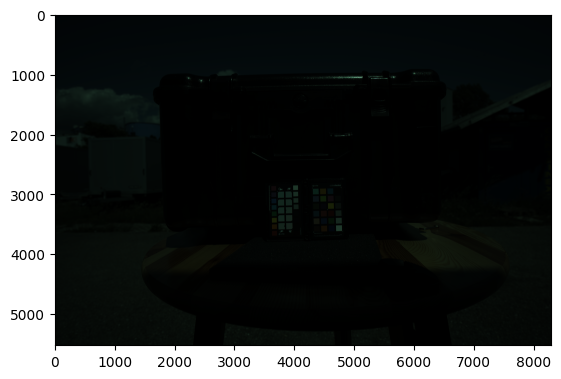

In [173]:
file_raw_0005o = ["data", "NikonZ7ii", "Outdoor", "OUT38", "INDIGO_2022-05-26_Z7ii-A_0005.NEF"]
path_raw_0005o = os.path.join(*file_raw_0005o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "XRCCPP", "Illuminant": OUT38, "Observer":2}
image_0005o = RawImage(path_raw_0005o, metadata, method="postprocess")

image_0005o.show(method="matplotlib")

RAW RGB data extraction

In [174]:
has_colourchecker, corners, size_rect = image_0005o.automatic_colourchecker_extraction(checker_name="XRCCPP_24", opencv_descriptor="SIFT")

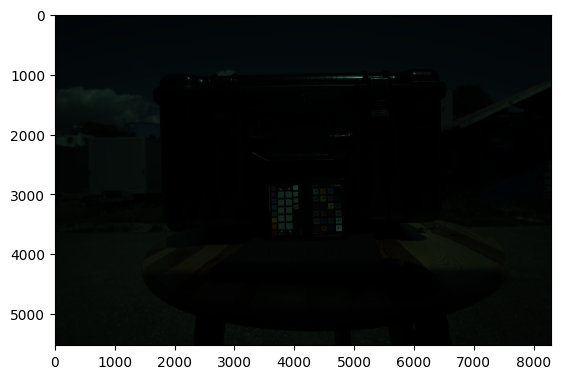

In [175]:
image_0005o.show_colourchecker(checker_name="XRCCPP", show_image=True, method="matplotlib")

In [176]:
XRCCPP_RGB_OUT38 = image_0005o.get_ColourCheckerRGB("XRCCPP").as_pandas_dataframe()

In [177]:
data_xrccpp_spd38 = pd.merge(XRCCPP_XYZ_OUT38, XRCCPP_RGB_OUT38, on="patch_id")
data_xrccpp_spd38.insert(0, "ColourChecker", "XRCCPP")
data_xrccpp_spd38

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   11.891077  10.661176   6.390290   
1   37.583495  33.737426  21.502524   
2   16.155317  17.097936  27.811143   
3   10.556210  12.861564   6.283393   
4   22.403080  21.154695  34.993859   
5   30.284882  41.298538  39.811491   
6   38.245198  30.128705   5.931726   
7   13.271713  11.802434  34.482086   
8   28.873330  19.122059  11.921118   
9    8.760790   6.556860  12.706182   
10  31.992774  40.904679   9.715278   
11  43.869404  40.125239   6.954858   
12   6.853890   5.728579  19.767842   
13  14.180485  22.181393   8.849408   
14  20.502351  12.376642   4.619937   
15  51.785047  54.126718   7.806769   
16  28.520333  18.758940  25.703252   
17  13.758465  18.657238  33.629416   
18  77.217580  80.514480  74.109832   
19  53.617095  55.921508  53.742197   
20  32.557891  34.000261  32.893509   
21  18.125667  18.889850  18.146416   
22   7.781224   8.141743   8.126925   
23   3.215941   3.346556   3.375571   

                                    illuminant_y            R            G  \
0   MeasuredIlluminant object: Illuminant SPD38.   332.172840   381.672840   
1   MeasuredIlluminant object: Illuminant SPD38.  1088.527778  1235.780864   
2   MeasuredIlluminant object: Illuminant SPD38.   375.765432   907.493827   
3   MeasuredIlluminant object: Illuminant SPD38.   272.740741   567.123457   
4   MeasuredIlluminant object: Illuminant SPD38.   588.080247  1085.617284   
5   MeasuredIlluminant object: Illuminant SPD38.   636.160494  1972.666667   
6   MeasuredIlluminant object: Illuminant SPD38.  1188.586420   859.135802   
7   MeasuredIlluminant object: Illuminant SPD38.   248.012346   664.876543   
8   MeasuredIlluminant object: Illuminant SPD38.   929.043210   519.308642   
9   MeasuredIlluminant object: Illuminant SPD38.   241.240741   291.842593   
10  MeasuredIlluminant object: Illuminant SPD38.   882.067901  1807.555556   
11  MeasuredIlluminant object: Illuminant SPD38.  1346.820988  1368.740741   
12  MeasuredIlluminant object: Illuminant SPD38.   123.975309   380.691358   
13  MeasuredIlluminant object: Illuminant SPD38.   319.8209

### WPP

White - D1

In [179]:
patch_max = find_patch_max_value(data_xrccpp_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['D1', 'D1', 'D1']
['D1', 'D1', 'D1']


In [180]:
data_xrccpp_spd38 = apply_wpp(data_xrccpp_spd38, "D1")
data_xrccpp_spd38

ColourChecker patch_id                                  illuminant_x  \
0         XRCCPP       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         XRCCPP       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         XRCCPP       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         XRCCPP       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         XRCCPP       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         XRCCPP       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         XRCCPP       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         XRCCPP       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         XRCCPP       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         XRCCPP       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        XRCCPP       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        XRCCPP       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        XRCCPP       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        XRCCPP       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        XRCCPP       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        XRCCPP       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        XRCCPP       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        XRCCPP       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        XRCCPP       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        XRCCPP       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        XRCCPP       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        XRCCPP       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        XRCCPP       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        XRCCPP       D6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.153994  0.132413  0.086227   
1   0.486722  0.419023  0.290144   
2   0.209218  0.212359  0.375269   
3   0.136707  0.159742  0.084785   
4   0.290129  0.262744  0.472189   
5   0.392202  0.512933  0.537196   
6   0.495291  0.374202  0.080040   
7   0.171874  0.146588  0.465284   
8   0.373922  0.237498  0.160857   
9   0.113456  0.081437  0.171451   
10  0.414320  0.508041  0.131093   
11  0.568127  0.498361  0.093845   
12  0.088761  0.071150  0.266737   
13  0.183643  0.275496  0.119409   
14  0.265514  0.153719  0.062339   
15  0.670638  0.672261  0.105341   
16  0.369350  0.232988  0.346826   
17  0.178178  0.231725  0.453778   
18  1.000000  1.000000  1.000000   
19  0.694364  0.694552  0.725170   
20  0.421638  0.422288  0.443848   
21  0.234735  0.234614  0.244858   
22  0.100770  0.101121  0.109661   
23  0.041648  0.041565  0.045548   

                                    illuminant_y         R         G         B  
0   MeasuredIlluminant object: Illuminant SPD38.  0.163520  0.104653  0.083913  
1   MeasuredIlluminant object: Illuminant SPD38.  0.535854  0.338846  0.297478  
2   MeasuredIlluminant object: Illuminant SPD38.  0.184980  0.248831  0.355360  
3   MeasuredIlluminant object: Illuminant SPD38.  0.134263  0.155503  0.096952  
4   MeasuredIlluminant object: Illuminant SPD38.  0.289497  0.297672  0.439860  
5   MeasuredIlluminant object: Illuminant SPD38.  0.313165  0.540898  0.529506  
6   MeasuredIlluminant object: Illuminant SPD38.  0.585110  0.235572  0.093581  
7   MeasuredIlluminant object: Illuminant SPD38.  0.122090  0.182307  0.379421  
8   MeasuredIlluminant object: Illuminant SPD38.  0.457344  0.142392  0.142125  
9   MeasuredIlluminant object: Illuminant SPD38.  0.118757  0.080022  0.138581  
10  MeasuredIlluminant object: Illuminant SPD38.  0.434219  0.495625  0.197967  
11  MeasuredIlluminant object: Illuminant SPD38.  0.663005  0.375303  0.126937  
12  MeasuredIlluminant object: Illuminant SPD38.  0.061030  0.104384  0.269883  
13  MeasuredIlluminant object: Illuminant SPD38.  0.157440  0.285291  0.155111  
14  Measure

In [181]:
data_xrccpp_spd38.describe()

X          Y          Z          R          G          B
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000000
mean    0.335633   0.319868   0.286329   0.349123   0.299640   0.282070
std     0.231853   0.234386   0.238768   0.253634   0.226605   0.225926
min     0.041648   0.041565   0.045548   0.042117   0.043343   0.044925
25%     0.167404   0.151937   0.102467   0.131603   0.133536   0.122975
50%     0.277822   0.236056   0.208155   0.301331   0.242201   0.213810
75%     0.437909   0.441306   0.446331   0.476971   0.387658   0.392617
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [182]:
data_wpp_spd38.append(data_xrccpp_spd38)

### SCK100

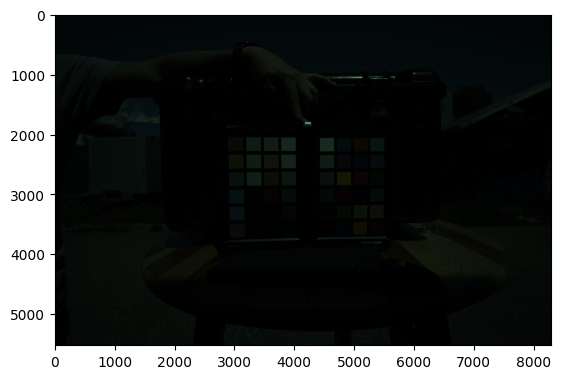

In [183]:
file_raw_0003o =  ["data", "NikonZ7ii", "Outdoor", "OUT38", "INDIGO_2022-05-26_Z7ii-A_0003.NEF"]
path_raw_0003o = os.path.join(*file_raw_0003o)

metadata = {"Camera": "Nikon Z7ii A", "Date": [[2022, 5, 26], [14, 15, 00]], "ColourChecker": "SCK100", "Illuminant": OUT38, "Observer":2}
image_0003o = RawImage(path_raw_0003o, metadata, method="postprocess")

image_0003o.show(method="matplotlib")

RAW RGB data extraction

In [184]:
has_colourchecker, corners, size_rect = image_0003o.automatic_colourchecker_extraction(checker_name="SCK100_48", opencv_descriptor="SIFT")

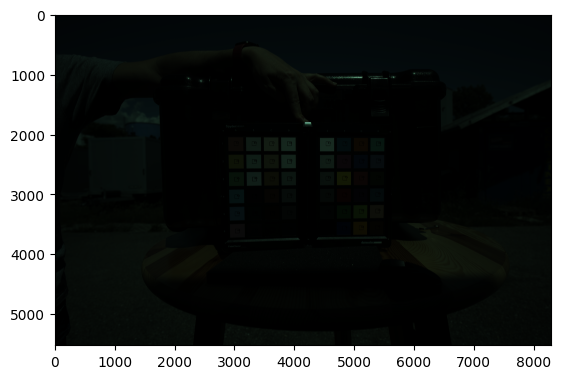

In [185]:
image_0003o.show_colourchecker(checker_name="SCK100", show_image=True, method="matplotlib")

In [186]:
SCK100_RGB_OUT38 = image_0003o.get_ColourCheckerRGB("SCK100").as_pandas_dataframe()

In [187]:
data_sck100_spd38 = pd.merge(SCK100_XYZ_OUT38, SCK100_RGB_OUT38, on="patch_id")
data_sck100_spd38.insert(0, "ColourChecker", "SCK100")
data_sck100_spd38

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD38.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD38.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD38.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD38.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD38.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD38.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD38.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD38.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD38.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD38.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD38.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD38.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD38.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD38.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD38.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD38.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD38.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD38.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD38.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD38.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD38.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD38.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD38.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD38.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD38.   

            X          Y          Z  \
0   36.589483  29.002199  18.884403   
1   47.100036  48.091830  15.446829   
2   27.222282  35.837295  20.504365   
3   24.772245  30.764313  44.381060   
4   26.699007  28.003448  48.533309   
5   34.604982  27.362907  30.370301   
6   59.245651  60.108604  55.791131   
7   56.271981  

### WPP

White - E1

In [189]:
patch_max = find_patch_max_value(data_sck100_spd38)
print(patch_max["XYZ"]["patch_id"])
print(patch_max["RGB"]["patch_id"])

['E1', 'E1', 'E1']
['E1', 'E1', 'E1']


In [190]:
data_sck100_spd38 = apply_wpp(data_sck100_spd38, "E1")
data_sck100_spd38

ColourChecker patch_id                                  illuminant_x  \
0         SCK100       A1  MeasuredIlluminant object: Illuminant SPD38.   
1         SCK100       A2  MeasuredIlluminant object: Illuminant SPD38.   
2         SCK100       A3  MeasuredIlluminant object: Illuminant SPD38.   
3         SCK100       A4  MeasuredIlluminant object: Illuminant SPD38.   
4         SCK100       A5  MeasuredIlluminant object: Illuminant SPD38.   
5         SCK100       A6  MeasuredIlluminant object: Illuminant SPD38.   
6         SCK100       B1  MeasuredIlluminant object: Illuminant SPD38.   
7         SCK100       B2  MeasuredIlluminant object: Illuminant SPD38.   
8         SCK100       B3  MeasuredIlluminant object: Illuminant SPD38.   
9         SCK100       B4  MeasuredIlluminant object: Illuminant SPD38.   
10        SCK100       B5  MeasuredIlluminant object: Illuminant SPD38.   
11        SCK100       B6  MeasuredIlluminant object: Illuminant SPD38.   
12        SCK100       C1  MeasuredIlluminant object: Illuminant SPD38.   
13        SCK100       C2  MeasuredIlluminant object: Illuminant SPD38.   
14        SCK100       C3  MeasuredIlluminant object: Illuminant SPD38.   
15        SCK100       C4  MeasuredIlluminant object: Illuminant SPD38.   
16        SCK100       C5  MeasuredIlluminant object: Illuminant SPD38.   
17        SCK100       C6  MeasuredIlluminant object: Illuminant SPD38.   
18        SCK100       D1  MeasuredIlluminant object: Illuminant SPD38.   
19        SCK100       D2  MeasuredIlluminant object: Illuminant SPD38.   
20        SCK100       D3  MeasuredIlluminant object: Illuminant SPD38.   
21        SCK100       D4  MeasuredIlluminant object: Illuminant SPD38.   
22        SCK100       D5  MeasuredIlluminant object: Illuminant SPD38.   
23        SCK100       D6  MeasuredIlluminant object: Illuminant SPD38.   
24        SCK100       E1  MeasuredIlluminant object: Illuminant SPD38.   
25        SCK100       E2  MeasuredIlluminant object: Illuminant SPD38.   
26        SCK100       E3  MeasuredIlluminant object: Illuminant SPD38.   
27        SCK100       E4  MeasuredIlluminant object: Illuminant SPD38.   
28        SCK100       E5  MeasuredIlluminant object: Illuminant SPD38.   
29        SCK100       E6  MeasuredIlluminant object: Illuminant SPD38.   
30        SCK100       F1  MeasuredIlluminant object: Illuminant SPD38.   
31        SCK100       F2  MeasuredIlluminant object: Illuminant SPD38.   
32        SCK100       F3  MeasuredIlluminant object: Illuminant SPD38.   
33        SCK100       F4  MeasuredIlluminant object: Illuminant SPD38.   
34        SCK100       F5  MeasuredIlluminant object: Illuminant SPD38.   
35        SCK100       F6  MeasuredIlluminant object: Illuminant SPD38.   
36        SCK100       G1  MeasuredIlluminant object: Illuminant SPD38.   
37        SCK100       G2  MeasuredIlluminant object: Illuminant SPD38.   
38        SCK100       G3  MeasuredIlluminant object: Illuminant SPD38.   
39        SCK100       G4  MeasuredIlluminant object: Illuminant SPD38.   
40        SCK100       G5  MeasuredIlluminant object: Illuminant SPD38.   
41        SCK100       G6  MeasuredIlluminant object: Illuminant SPD38.   
42        SCK100       H1  MeasuredIlluminant object: Illuminant SPD38.   
43        SCK100       H2  MeasuredIlluminant object: Illuminant SPD38.   
44        SCK100       H3  MeasuredIlluminant object: Illuminant SPD38.   
45        SCK100       H4  MeasuredIlluminant object: Illuminant SPD38.   
46        SCK100       H5  MeasuredIlluminant object: Illuminant SPD38.   
47        SCK100       H6  MeasuredIlluminant object: Illuminant SPD38.   

           X         Y         Z  \
0   0.423715  0.323524  0.224013   
1   0.545430  0.536472  0.183235   
2   0.315241  0.399771  0.243230   
3   0.286869  0.343181  0.526463   
4   0.309181  0.312383  0.575718   
5   0.400734  0.305237  0.360263   
6   0.686079  0.670521  0.661813   
7   0.651643  0.669271  0.649288   
8  

In [191]:
data_sck100_spd38.describe()

X          Y          Z          R          G          B
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000
mean    0.352295   0.340599   0.304916   0.362390   0.318874   0.297856
std     0.248913   0.248738   0.250364   0.274057   0.254127   0.256363
min     0.047090   0.047131   0.048739   0.014533   0.015152   0.015950
25%     0.142515   0.137983   0.083301   0.114532   0.103169   0.074516
50%     0.312211   0.295110   0.233621   0.300196   0.270504   0.215031
75%     0.515768   0.490815   0.459350   0.579465   0.462819   0.437844
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000

In [192]:
data_wpp_spd38.append(data_sck100_spd38)

## Merge data

In [194]:
data_pd_wpp_spd38 = pd.concat(data_wpp_spd38, ignore_index=True)

data_pd_wpp_spd38 = data_pd_wpp_spd38.drop(columns="illuminant_y")
data_pd_wpp_spd38 = data_pd_wpp_spd38.rename(columns={"illuminant_x":"illuminant"})
data_pd_wpp_spd38["illuminant"] = "SPD38" # as str to avoid error
data_pd_wpp_spd38

ColourChecker patch_id illuminant         X         Y         Z         R  \
0           CCDSG       B2      SPD38  0.194845  0.119592  0.164366  0.199174   
1           CCDSG       B3      SPD38  0.447627  0.360561  0.526236  0.444574   
2           CCDSG       B4      SPD38  0.175087  0.107268  0.290685  0.138202   
3           CCDSG       B5      SPD38  0.217329  0.236061  0.623106  0.122326   
4           CCDSG       B6      SPD38  0.279850  0.351300  0.589185  0.197328   
..            ...      ...        ...       ...       ...       ...       ...   
211        SCK100       H2      SPD38  0.290914  0.265909  0.470194  0.270724   
212        SCK100       H3      SPD38  0.121935  0.145765  0.075621  0.108647   
213        SCK100       H4      SPD38  0.203656  0.210562  0.365814  0.166979   
214        SCK100       H5      SPD38  0.444042  0.388328  0.265094  0.579025   
215        SCK100       H6      SPD38  0.130159  0.110435  0.070772  0.160185   

            G         B  
0    0.051679  0.098346  
1    0.309673  0.439275  
2    0.061534  0.183662  
3    0.298709  0.559755  
4    0.428873  0.578928  
..        ...       ...  
211  0.283898  0.422385  
212  0.132747  0.068805  
213  0.238001  0.330704  
214  0.354529  0.284384  
215  0.079231  0.051040  

[216 rows x 9 columns]

## Export data as CSV

Merge all data

In [204]:
data_WPP = pd.concat([data_pd_wpp_spd29, data_pd_wpp_spd30, data_pd_wpp_spd38], ignore_index=True)

In [207]:
data_WPP.describe()

X           Y           Z           R           G           B
count  648.000000  648.000000  648.000000  648.000000  648.000000  648.000000
mean     0.352144    0.338174    0.292846    0.361845    0.316538    0.289779
std      0.241978    0.239004    0.244948    0.260068    0.238184    0.240028
min      0.036863    0.036939    0.038539    0.009136    0.008643    0.009002
25%      0.150959    0.145223    0.093570    0.123717    0.112706    0.101913
50%      0.303398    0.275882    0.217501    0.312887    0.274702    0.220725
75%      0.486035    0.473058    0.424528    0.546468    0.448039    0.405266
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [206]:
path_csv = os.path.join("res", "csv", "NZ_WPPDS.csv")
data_WPP.to_csv(path_csv, sep=";")